# **OLDER CAR PRICE PREDICTION OF INDIAN CARS**

Datset Link: https://www.kaggle.com/saisaathvik/used-cars-dataset-from-cardekhocom

Used dataset: cardekho_imputated.csv

***IMPORTING NECESSARY LIBRARIES***

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **DESCRIPTIVE ANALYSIS**

In [302]:
data = pd.read_csv("cardekho_imputated1.csv")
data

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,6.983200e+05,7.293333e+05,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,9.267760e+05,1.149968e+06,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,8.926327e+05,1.563551e+06,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,1.783000e+06,2.491000e+06,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


OBSERVATION:

Number of Rows = 15411

Number of Columns = 16

In [303]:
data.head()

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [304]:
data.tail()

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,19537,Hyundai i10,Hyundai,i10,6.983200e+05,7.293333e+05,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,9.267760e+05,1.149968e+06,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,8.926327e+05,1.563551e+06,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,1.783000e+06,2.491000e+06,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,19543,Honda City,Honda,City,1.330978e+06,1.707437e+06,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [305]:
data.shape

(15411, 16)

In [306]:
data.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'min_cost_price',
       'max_cost_price', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   min_cost_price     15411 non-null  float64
 5   max_cost_price     15411 non-null  float64
 6   vehicle_age        15411 non-null  int64  
 7   km_driven          15411 non-null  int64  
 8   seller_type        15411 non-null  object 
 9   fuel_type          15411 non-null  object 
 10  transmission_type  15411 non-null  object 
 11  mileage            15411 non-null  float64
 12  engine             15411 non-null  int64  
 13  max_power          15411 non-null  float64
 14  seats              15411 non-null  int64  
 15  selling_price      15411 non-null  int64  
dtypes: float64(4), int64(6

OBSERVATION:

Categorical data type:car_name,brand,model,seller_type,fuel_type,transmission_type

Numerical features: min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling price

In [308]:
data.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
min_cost_price       0
max_cost_price       0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

OBSERVATION:

There are no null values in the dataset

In [309]:
# dropping Unnamed: 0 column as it is just a index column and it does not add any value to the EDA and modelling process
data = data[['car_name', 'brand', 'model', 'min_cost_price',
       'max_cost_price', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats','selling_price']]
data

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,6.983200e+05,7.293333e+05,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,9.267760e+05,1.149968e+06,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,8.926327e+05,1.563551e+06,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,1.783000e+06,2.491000e+06,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


***Knowing about the categorical features***

In [310]:
print(data["fuel_type"].nunique())
print(data["fuel_type"].unique())

5
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [311]:
print(data["seller_type"].nunique())
print(data["seller_type"].unique())

3
['Individual' 'Dealer' 'Trustmark Dealer']


In [312]:
print(data["transmission_type"].nunique())
print(data["transmission_type"].unique())

2
['Manual' 'Automatic']


In [313]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
min_cost_price,15411.0,5.892971e+06,5.669851e+07,311000.0,668000.000000,855000.00,1284000.0,9.880000e+08
max_cost_price,15411.0,1.962624e+06,2.889636e+06,436000.0,872866.666667,1206000.00,1743000.0,9.110000e+07
vehicle_age,15411.0,6.036338e+00,3.013291e+00,0.0,4.000000,6.00,8.0,2.900000e+01
km_driven,15411.0,5.561648e+04,5.161855e+04,100.0,30000.000000,50000.00,70000.0,3.800000e+06
mileage,15411.0,1.970115e+01,4.171265e+00,4.0,17.000000,19.67,22.7,3.354000e+01
engine,15411.0,1.486058e+03,5.211067e+02,793.0,1197.000000,1248.00,1582.0,6.592000e+03
max_power,15411.0,1.005883e+02,4.297298e+01,38.4,74.000000,88.50,117.3,6.260000e+02
seats,15411.0,5.325482e+00,8.076284e-01,0.0,5.000000,5.00,5.0,9.000000e+00
selling_price,15411.0,7.749711e+05,8.941284e+05,40000.0,385000.000000,556000.00,825000.0,3.950000e+07


# **EXPLORATORY DATA ANALYSIS**

Exploratory data analysis is the process of understanding about the data with the help of graphs and statistical summary. It helps to see data beyond modelling and hypothesis testing and hepls in better understanding about the data and relations among various features of the dataset.

**UNIVARIATE ANALYSIS**

Univariate analysis is nothing but the analysis of a single/one feature

***Finding the most popular car brand***

In [314]:
#source code :https://jovian.ai/rayankazi/eda-used-cars
popular_brands = data.car_name.value_counts().head(10)
popular_brands

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: car_name, dtype: int64

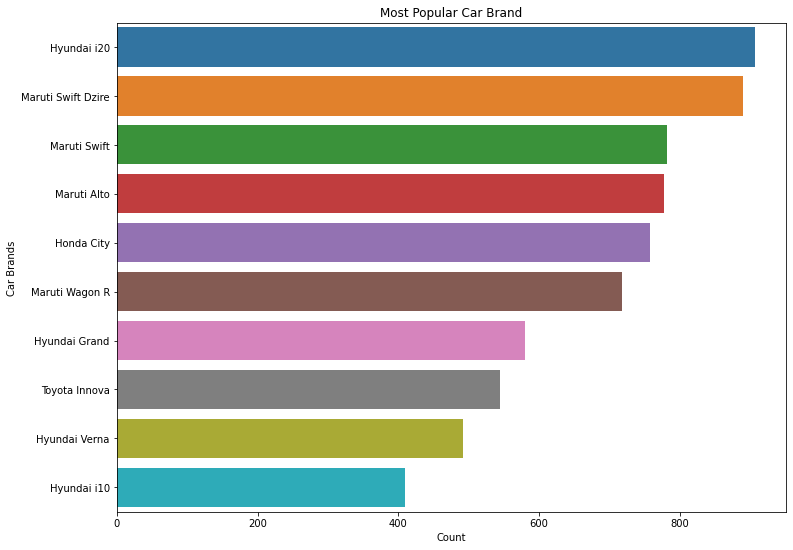

In [315]:
#source code :https://jovian.ai/rayankazi/eda-used-cars
plt.figure(figsize=(12,9))
plt.title('Most Popular Car Brand')
plt.xlabel('Count')
plt.ylabel('Car Brands')
sns.barplot(x = popular_brands.values, y = popular_brands.index)



OBSERVATION:

Hyundai i20 is the most popular car brand for reselling followed by Maruti Swift Dezire and Maruthi Swift

***Finding which fuel type is preferred most***

In [316]:
prefered_fuel = data.fuel_type.value_counts()
prefered_fuel

Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: fuel_type, dtype: int64

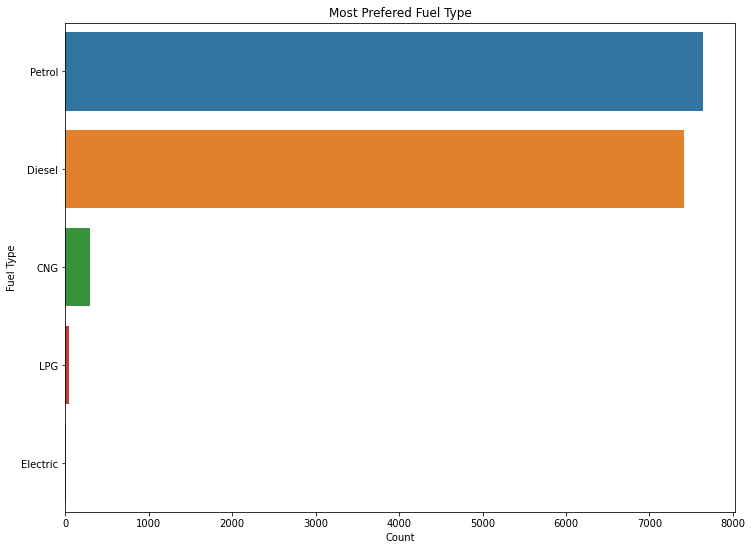

In [317]:
plt.figure(figsize=(12,9))
plt.title('Most Prefered Fuel Type')
plt.xlabel('Count')
plt.ylabel('Fuel Type')
sns.barplot(x = prefered_fuel.values, y = prefered_fuel.index)

OBSERVATION:

The most prefered engine type is Petrol followed by diesel, CNG, LPG and electric

***FINDING THE  AGE OF VEHICLES PREFERED BY THE BUYERS***

In [318]:
prefered_age = data.vehicle_age.value_counts().head(10)
prefered_age

4     2252
5     2117
3     1926
6     1924
7     1438
8     1282
2     1145
9     1027
10     710
11     551
Name: vehicle_age, dtype: int64

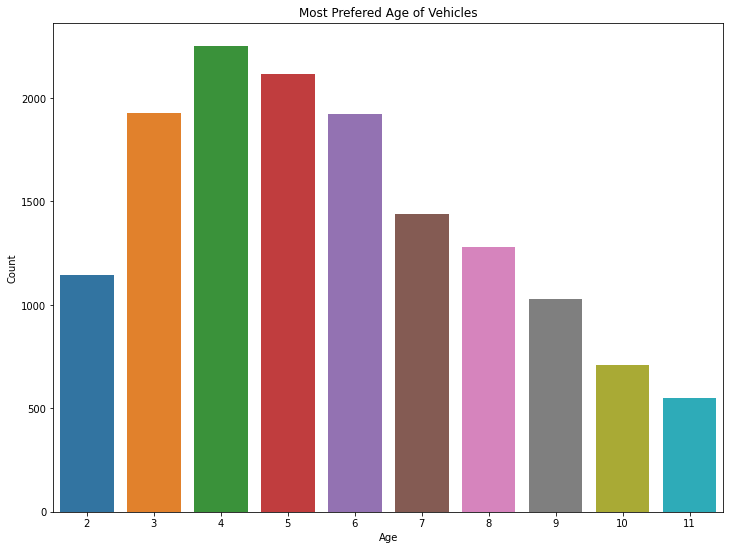

In [319]:
plt.figure(figsize=(12,9))
plt.title('Most Prefered Age of Vehicles')
plt.xlabel('Age')
plt.ylabel('Count')
sns.barplot(x = prefered_age.index, y = prefered_age.values)

OBSERVATION:
The most prefered age of vehicles is between 3 to 6 years for buying the second hand cars

***Most preferred transmission type***

In [320]:
most_prefered_transmission_type = data.transmission_type.value_counts()
most_prefered_transmission_type

Manual       12225
Automatic     3186
Name: transmission_type, dtype: int64

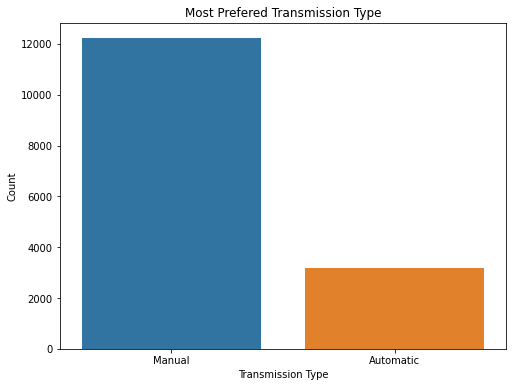

In [321]:
plt.figure(figsize=(8,6))
plt.title('Most Prefered Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
sns.barplot(x = most_prefered_transmission_type.index, y = most_prefered_transmission_type.values)

OBSERVATION:

The manual type of transmission is preferred most compared to automatic type.

***FINDING THE MOST PREFERED SEATS OF THE CARS***

In [322]:
prefered_seats = data.seats.value_counts()
prefered_seats

5    12910
7     1922
8      311
6      127
4       77
9       55
2        7
0        2
Name: seats, dtype: int64

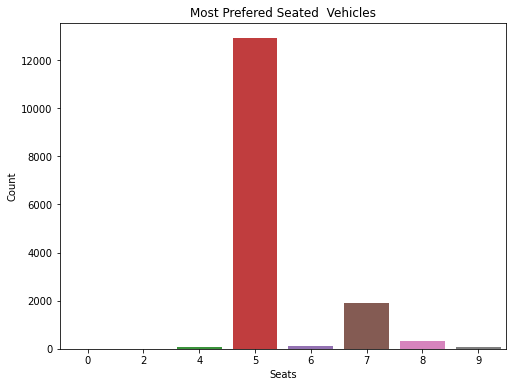

In [323]:
plt.figure(figsize=(8,6))
plt.title('Most Prefered Seated  Vehicles')
plt.xlabel('Seats')
plt.ylabel('Count')
sns.barplot(x = prefered_seats.index, y = prefered_seats.values)

OBSERVATION:

The most prefered seated vehicle for second hand car buying is 5 followed by the 7 seater.

***FINDING THE PREFERED SELLER TYPE***

In [324]:
prefered_seller_type = data.seller_type.value_counts()
prefered_seller_type

Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: seller_type, dtype: int64

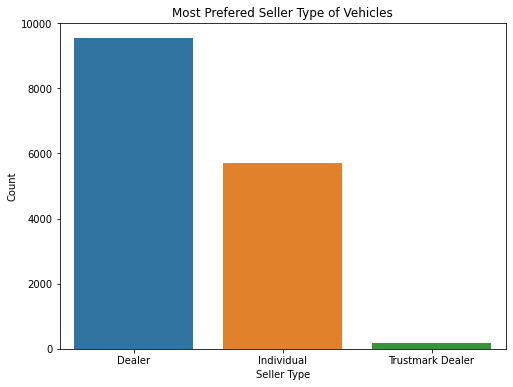

In [325]:
plt.figure(figsize=(8,6))
plt.title('Most Prefered Seller Type of Vehicles')
plt.xlabel('Seller Type')
plt.ylabel('Count')
sns.barplot(x = prefered_seller_type.index, y = prefered_seller_type.values)

OBSERVATION:

The second hand car buyers wish to buy from dealers than the other type of sellers.

**BIVARIATE ANALYSIS**

Bivariate analysis refers to analysing two variables/features to undestand relation between them.

***Finding the car price variation with the car brand***

Text(0.5, 1.0, 'Car Price Variation with Car Brand')

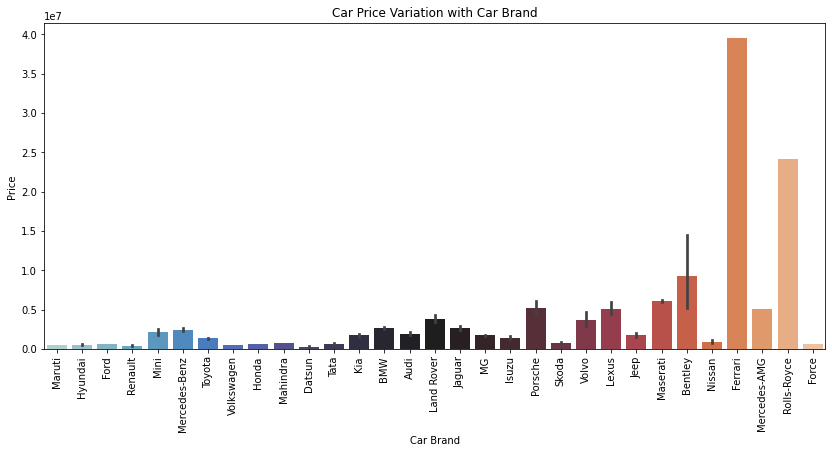

In [326]:
#souce_code : https://jovian.ai/rayankazi/eda-used-cars
plt.figure(figsize=(14,6))
sns.barplot( x=data.brand, y=data.selling_price, data=data, palette='icefire');
plt.xticks(rotation = 90)
plt.xlabel('Car Brand');
plt.ylabel('Price');
plt.title('Car Price Variation with Car Brand')

OBSERVATION:

The selling price of Ferrari brand is the highest and Datsun is the lowest.

***Finding the car price variation with the engine type***

Text(0.5, 1.0, 'Car Price Variation with Fuel Type')

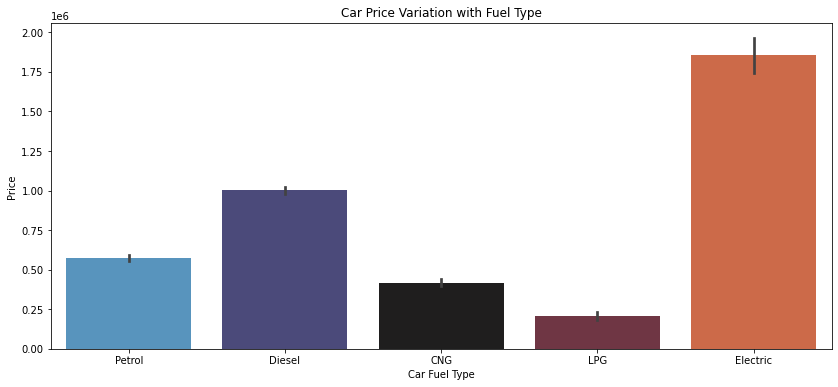

In [327]:
plt.figure(figsize=(14,6))
sns.barplot( x=data.fuel_type, y=data.selling_price, data=data, palette='icefire');
plt.xlabel('Car Fuel Type');
plt.ylabel('Price');
plt.title('Car Price Variation with Fuel Type')



OBSERVATION:

The selling price of second hand electric cars is the highest followed by diesel and petrol

***Finding the car price variation with the car age***

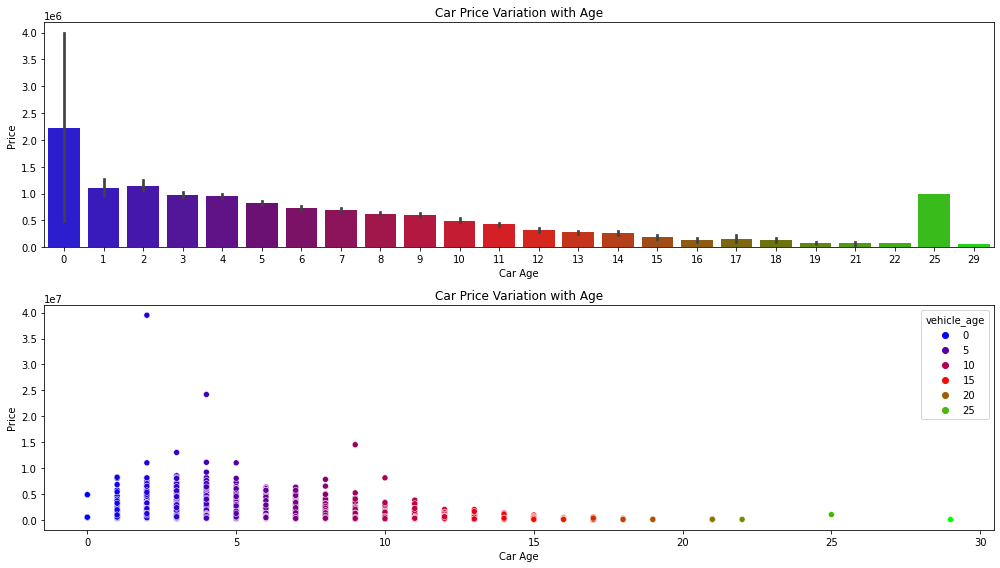

In [328]:
plt.figure(figsize=(14,8))
plt.subplot(2, 1, 1)
sns.barplot( x=data.vehicle_age, y=data.selling_price, data=data, palette='brg');
plt.xlabel('Car Age');
plt.ylabel('Price');
plt.title('Car Price Variation with Age')

plt.subplot(2, 1, 2)
sns.scatterplot( x=data.vehicle_age, y=data.selling_price, data=data,hue ="vehicle_age", palette='brg');
plt.xlabel('Car Age');
plt.ylabel('Price');
plt.title('Car Price Variation with Age')
plt.tight_layout()



OBSERVATION:

The selling price of vehicles aged less than 1 year is more and in majority of the cases the selling price decreases with the age. We can also observe that the selling price of 25 years old cars is more beacause they may be considred as rare and obsolete cars.

***Finding the car price variation with the seller type***

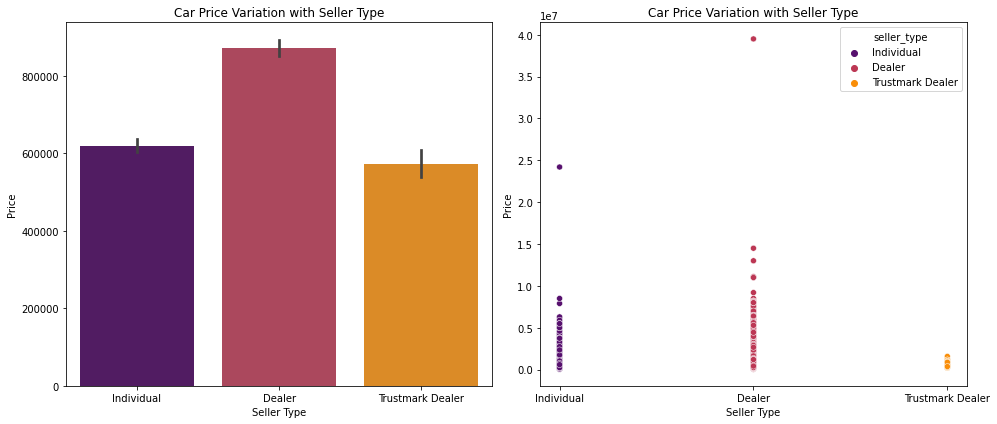

In [329]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.barplot( x=data.seller_type, y=data.selling_price, data=data, palette='inferno');
plt.xlabel('Seller Type');
plt.ylabel('Price');
plt.title('Car Price Variation with Seller Type')

plt.subplot(1, 2, 2)
sns.scatterplot( x=data.seller_type, y=data.selling_price, data=data,hue ="seller_type",  palette='inferno');
plt.xlabel('Seller Type');
plt.ylabel('Price');
plt.title('Car Price Variation with Seller Type')
plt.tight_layout()


OBSERVATION:

The selling price of cars which are sold through dealers is more followed by individuals and trustmark dealer.

***Finding the car price variation with the transmission type***

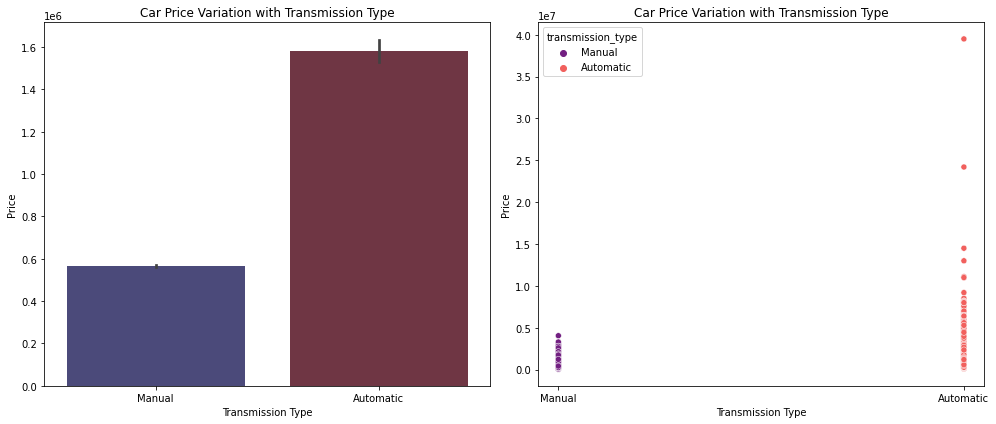

In [330]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.barplot( x=data.transmission_type, y=data.selling_price, data=data, palette='icefire');
plt.xlabel('Transmission Type');
plt.ylabel('Price');
plt.title('Car Price Variation with Transmission Type')

plt.subplot(1, 2, 2)
sns.scatterplot(x=data.transmission_type, y=data.selling_price, data=data, palette='magma',hue = "transmission_type")
plt.xlabel('Transmission Type');
plt.ylabel('Price');
plt.title('Car Price Variation with Transmission Type')

plt.tight_layout()

OBSERVATION:

The selling price of automatic cars is more than the manual cars.

***Finding the car price variation with the number of seats***

Text(0.5, 1.0, 'Car Price Variation with the Number of Seats')

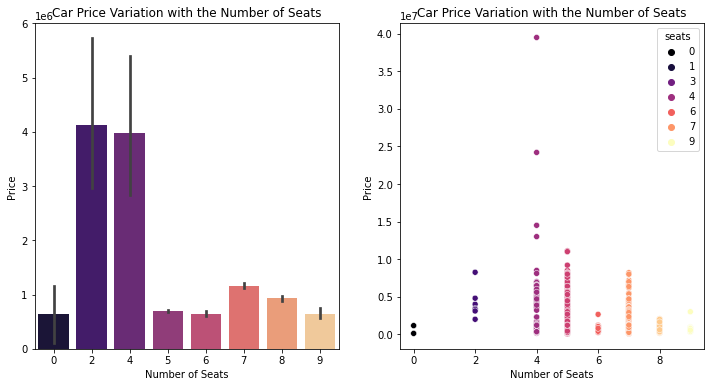

In [331]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot( x=data.seats, y=data.selling_price, data=data, palette='magma');
plt.xlabel('Number of Seats');
plt.ylabel('Price');
plt.title('Car Price Variation with the Number of Seats')

plt.subplot(1, 2, 2)
sns.scatterplot( x=data.seats, y=data.selling_price, data=data,hue = "seats", palette='magma');
plt.xlabel('Number of Seats');
plt.ylabel('Price');
plt.title('Car Price Variation with the Number of Seats')



OBSERVATION:

The selling price of 2 and 4seated cars is highest.

***Finding the variation of mileage with age***

Text(0.5, 1.0, 'Car Mileage Variation with Age')

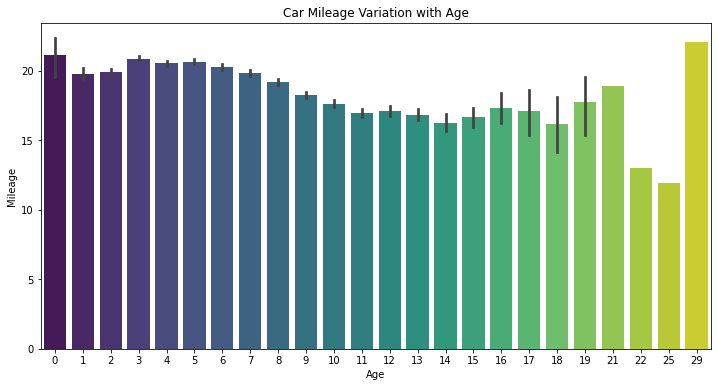

In [332]:
plt.figure(figsize=(12,6))
sns.barplot( x=data.vehicle_age, y=data.mileage, data=data, palette='viridis');
plt.xlabel('Age');
plt.ylabel('Mileage');
plt.title('Car Mileage Variation with Age')

OBSERVATION:

The mileage decreases with the age.

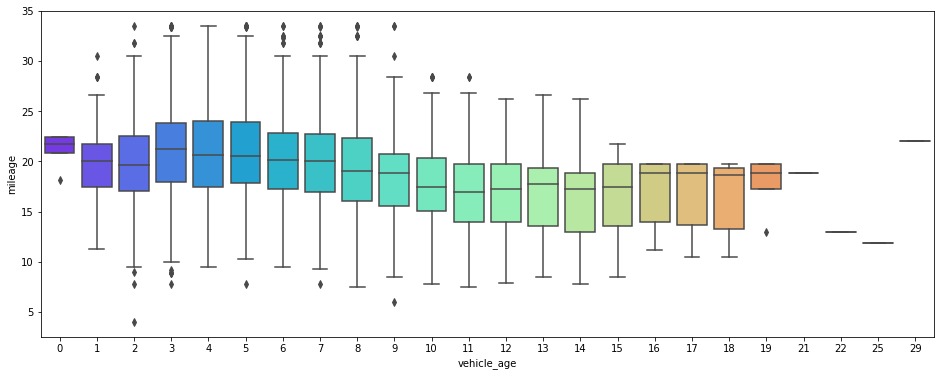

In [333]:
plt.figure(figsize=(16,6))
sns.boxplot(x= data.vehicle_age,y=data.mileage,data=data,palette='rainbow')




OBSERVATION

The mean mileage is below 20 for majority of the cases and the mileage decreases with the age.

***Finding the variation of max_power with the age***

Text(0.5, 1.0, 'Car Max_power Variation with Age')

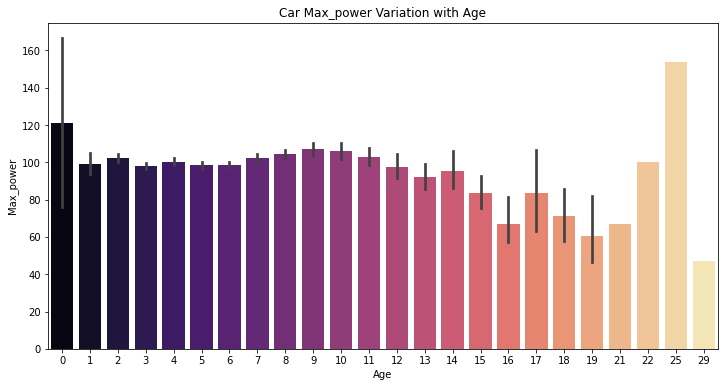

In [334]:
plt.figure(figsize=(12,6))
sns.barplot( x=data.vehicle_age, y=data.max_power, data=data, palette='magma');
plt.xlabel('Age');
plt.ylabel('Max_power');
plt.title('Car Max_power Variation with Age')

OBSERVATION:

The max_power of the engine decreases with the age.

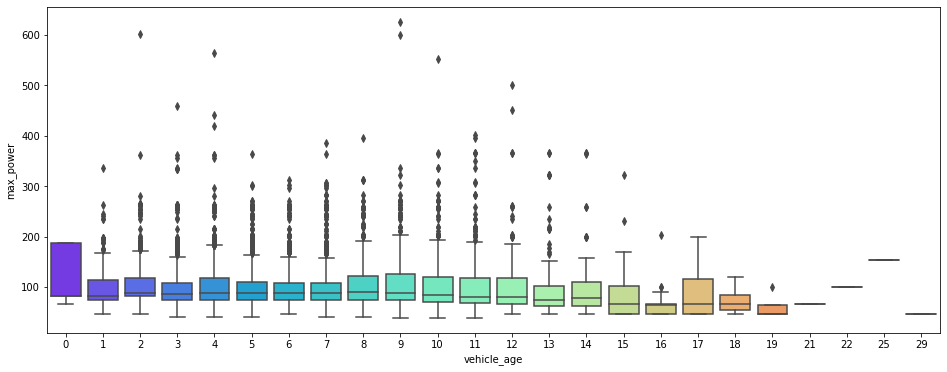

In [335]:
plt.figure(figsize=(16,6))
sns.boxplot(x= data.vehicle_age,y=data.max_power,data=data,palette='rainbow')


**Observation:**

For majority of the cases the mean max_power is below 100 and is decreasing with the age.

***Finding the variation of km_driven and age***

Text(0.5, 1.0, 'Km_driven Variation with Age')

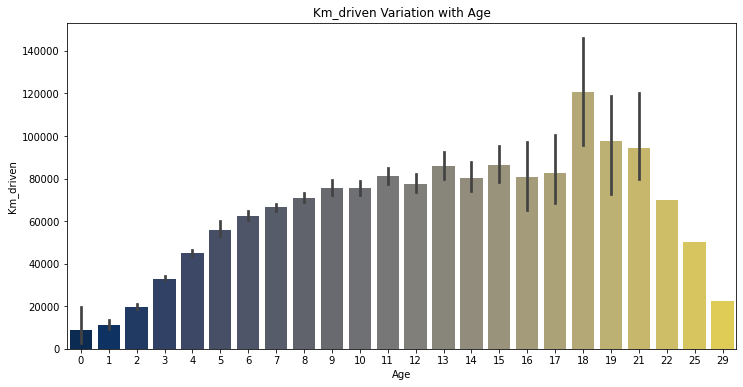

In [336]:
plt.figure(figsize=(12,6))
sns.barplot( x=data.vehicle_age, y=data.km_driven, data=data, palette='cividis');
plt.xlabel('Age');
plt.ylabel('Km_driven');
plt.title('Km_driven Variation with Age')

**Observation:** 

As the age increases the km_driven also increases.

# ***MULTIVARIATE ANALYSIS***

In multivariate analysis we look or analyse more than two variables/features.

very commonly used plot for multivariate analysis is the heatmap to understand about correlations.

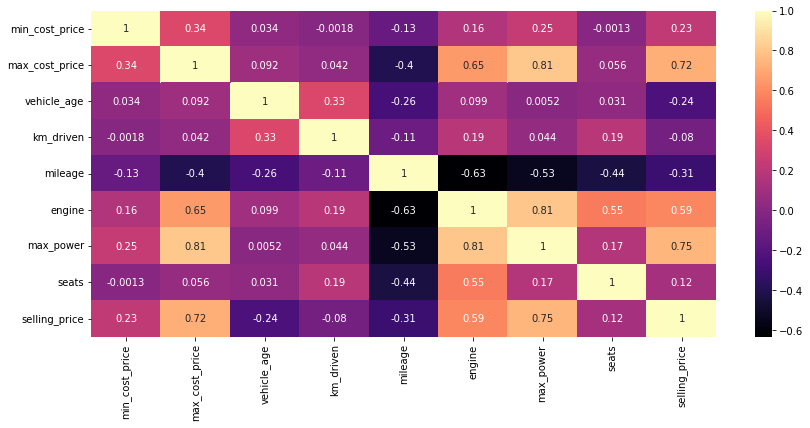

In [337]:
mat_corr = data.corr()
plt.figure(figsize = (14,6))
sns.heatmap(mat_corr,annot = True,cmap = "magma")


OBSERVATION:

1) There is a strong positive correlation between the selling price and the featues such as max_power,max_cost_price,engine.

2) There is a weak positive correlation between the selling price and number of seats and min_cost_price.

3) There is a neagtive correlation between the selling price and vehicle_age and km_driven

In [338]:
from scipy.stats import pearsonr
data1 = data["km_driven"]
data2 = data["selling_price"]
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.080


OBSERVATION:

There is a neagtive correlation between selling price and km driven which means the selling price decreases with the increase in km driven and vice versa.

In [339]:
data5 = data["max_power"]
data6 = data["selling_price"]
corr, _ = pearsonr(data5, data6)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.750


OBSERVATION:

There is a positive correlation between selling price and max_power which means if max_power is more the selling price is more.

In [340]:
data7 = data["km_driven"]
data8 = data["mileage"]
corr, _ = pearsonr(data7, data8)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.105


There is negative correlation between the mileage and km_driven which means as the km_driven increases the mileage decreases.

# ***CONCLUSIONS OF EDA***

***Below are the people preferences while buying the used cars:***


1) Hyundai i20 is the most popular car brand for reselling followed by Maruti Swift Dezire and Maruthi Swift. People are more interested in buying these top 3 models may be because of their popularity, quality, service and may be due to the affordability.

2) People wish to buy more petrol and diesel cars compared to other types of cars.

3) The most prefered age of vehicles is between 3 to 6 years for buying the second hand cars.

4) People wish to buy manual cars compared to automatic cars.

5) More people wish to buy 5 seated cars.

6) People wish to buy cars through dealers because of quality,service and warranty assured by them and also the selling price of vehicles is also more for the vehicles sold through the dealers.

7) The mileage of the car reduces with the km_driven increases.

8) As the age increases km_driven increases.

9) The max_power of the engine decreases with the age.For majority of the cases the mean max_power is below 100 and is decreasing with the age.

10) The mileage decreases with the age. 
The mean mileage is below 20 for majority of the cases and the mileage decreases with the age.





***Selling price of cars***


1) The selling price of costly model's remains same even for the old cars(eg. Ferrari).

2) The price of used electric cars is more compared to petrol and diesel cars.

3) The selling price of the car decreases with the age. The selling price of 25 years old cars is more beacause they may be considred as rare and obsolete cars.

4) The selling price of automatic cars is more comapred to manual cars.

5) The selling price of 2 and 4 seated vehicles are high.

6) The selling price decreases with the increase in km driven.

7) The selling price is more if the max_power of engine is more.

# **FEATURE EXTRACTION**

***OUTLIER REMOVAL***

***a) Checking for zero seated vehicles and zero aged vehicles***

In [341]:
# checking for zero seated vehicles since no car has zero seats
print(data[data["seats"] == 0].value_counts())

# checking for zero age vehicles as zero aged vehicles are not considered as second hand cars
print(data[data["vehicle_age"] == 0].value_counts())

# Removing the outliers
modified_dataset2 = data
modified_dataset2 = data[(data["vehicle_age"] != 0)]
#print(modified_dataset2.shape)

modified_dataset3 = modified_dataset2[(modified_dataset2["seats"] != 0)]
#print(modified_dataset3.shape)

dataset = modified_dataset3
dataset.shape


car_name      brand   model  min_cost_price  max_cost_price  vehicle_age  km_driven  seller_type  fuel_type  transmission_type  mileage  engine  max_power  seats  selling_price
Honda City    Honda   City   1.290000e+06    1699000.0       18           40000      Individual   Petrol     Manual             13.00    1493    100.00     0      115000           1
Nissan Kicks  Nissan  Kicks  1.104667e+06    1696000.0       2            10000      Individual   Diesel     Manual             19.39    1461    108.49     0      1154000          1
dtype: int64
car_name         brand     model     min_cost_price  max_cost_price  vehicle_age  km_driven  seller_type  fuel_type  transmission_type  mileage  engine  max_power  seats  selling_price
BMW 5            BMW       5         7.320000e+06    8.267000e+06    0            2000       Dealer       Diesel     Automatic          22.48    1995    187.74     5      4850000          2
Mahindra KUV     Mahindra  KUV       6.740000e+05    8.560000e+05    0 

(15404, 15)

***b) Checking for Zero mileage,engine and max_power***

In [342]:
print(dataset[dataset["mileage"] == 0].value_counts())

print(dataset[dataset["engine"] == 0].value_counts())

print(dataset[dataset["max_power"] == 0].value_counts())

Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)


***c) Checking the rows where min_cost_price is greater than max_cost_price***

In [343]:
print(dataset[dataset["min_cost_price"] > dataset["max_cost_price"]].value_counts())

car_name               brand          model    min_cost_price  max_cost_price  vehicle_age  km_driven  seller_type  fuel_type  transmission_type  mileage  engine  max_power  seats  selling_price
Mercedes-Benz C-Class  Mercedes-Benz  C-Class  4.762000e+08    1.600000e+07    9            63000      Dealer       Petrol     Automatic          11.74    1796    186.00     5      1275000          2
Mercedes-Benz E-Class  Mercedes-Benz  E-Class  7.417000e+08    1.720000e+07    4            26000      Dealer       Petrol     Automatic          12.00    1991    184.00     5      4150000          2
BMW X5                 BMW            X5       8.709354e+08    1.028768e+07    5            47270      Dealer       Diesel     Automatic          15.97    2993    258.00     5      4150000          1
Mercedes-Benz E-Class  Mercedes-Benz  E-Class  1.546399e+08    1.101937e+07    7            80000      Dealer       Diesel     Automatic          14.21    2143    203.00     5      1999000          1
     

In [344]:
dataset.shape

(15404, 15)

In [345]:
dataset = dataset[dataset["min_cost_price"] < dataset["max_cost_price"]]
dataset.shape


(14840, 15)

In [346]:
dataset

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,6.983200e+05,7.293333e+05,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,9.267760e+05,1.149968e+06,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,8.926327e+05,1.563551e+06,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,1.783000e+06,2.491000e+06,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


***Checking for the mileage outliers using Percentiles***

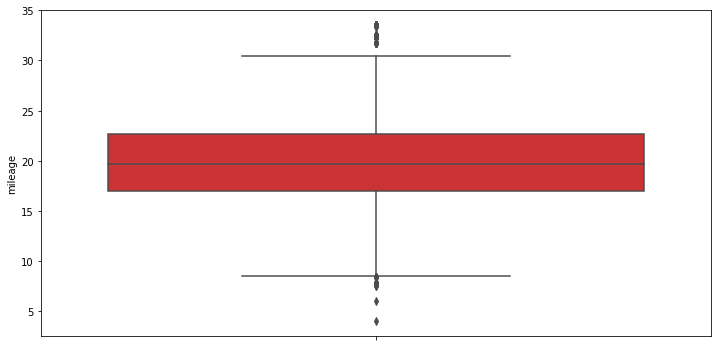

In [347]:
plt.figure(figsize=(12,6))
sns.boxplot(y = "mileage", data=data, palette='Set1');


In [348]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =data["mileage"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 4.0
10 percentile value is 13.96
20 percentile value is 16.1
30 percentile value is 17.43
40 percentile value is 18.6
50 percentile value is 19.67
60 percentile value is 20.54
70 percentile value is 21.94
80 percentile value is 23.1
90 percentile value is 25.2
100 percentile value is  33.54


In [349]:
for i in range(90,100):
    var = data["mileage"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 25.2
91 percentile value is 25.47
92 percentile value is 25.8
93 percentile value is 26.0
94 percentile value is 26.2
95 percentile value is 26.59
96 percentile value is 27.3
97 percentile value is 28.09
98 percentile value is 28.4
99 percentile value is 28.4
100 percentile value is  33.54


In [350]:
for i in np.arange(0.0, 1.0, 0.1):
    var = data["mileage"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 28.4
99.1 percentile value is 28.4
99.2 percentile value is 28.4
99.3 percentile value is 28.4
99.4 percentile value is 30.46
99.5 percentile value is 30.47
99.6 percentile value is 31.79
99.7 percentile value is 32.52
99.8 percentile value is 33.44
99.9 percentile value is 33.54
100 percentile value is  33.54


The mileages are within the limits

***Checking for  max_power outliers***

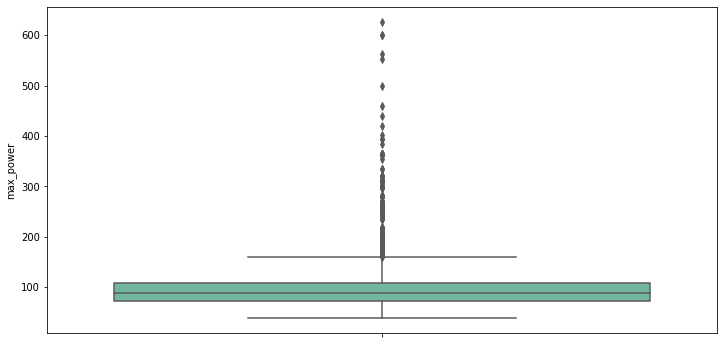

In [351]:
plt.figure(figsize=(12,6))
sns.boxplot(y = "max_power", data=dataset, palette= "Set2");

In [352]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =dataset["max_power"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 38.4
10 percentile value is 67.0
20 percentile value is 70.0
30 percentile value is 77.0
40 percentile value is 81.86
50 percentile value is 88.5
60 percentile value is 90.0
70 percentile value is 103.25
80 percentile value is 120.0
90 percentile value is 141.0
100 percentile value is  626.0


In [353]:
for i in range(90,100):
    var = dataset["max_power"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 141.0
91 percentile value is 147.8
92 percentile value is 154.0
93 percentile value is 168.5
94 percentile value is 170.0
95 percentile value is 174.33
96 percentile value is 181.0
97 percentile value is 187.74
98 percentile value is 190.0
99 percentile value is 218.0
100 percentile value is  626.0


In [354]:
for i in np.arange(0.0, 1.0, 0.1):
    var = dataset["max_power"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 218.0
99.1 percentile value is 240.0
99.2 percentile value is 244.1
99.3 percentile value is 254.79
99.4 percentile value is 258.0
99.5 percentile value is 261.49
99.6 percentile value is 282.0
99.7 percentile value is 301.72
99.8 percentile value is 335.3
99.9 percentile value is 364.9
100 percentile value is  626.0


In [355]:
# removing the outliers based on 99th percentile value
dataset = dataset[dataset["max_power"]< 626.0]
dataset


,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,6.983200e+05,7.293333e+05,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,9.267760e+05,1.149968e+06,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,8.926327e+05,1.563551e+06,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,1.783000e+06,2.491000e+06,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


***Checking for engine outliers***

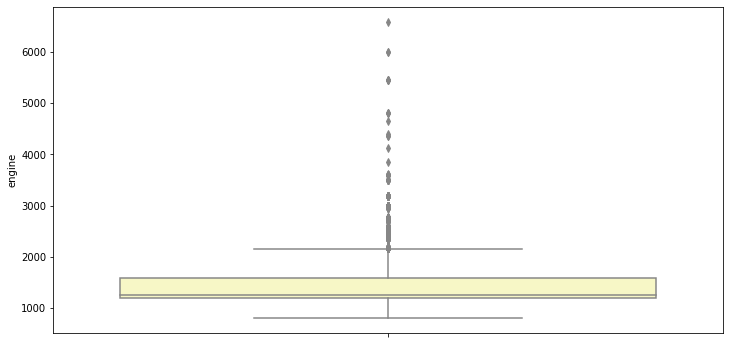

In [356]:
plt.figure(figsize=(12,6))
sns.boxplot(y = "engine", data=dataset, palette="Spectral");

In [357]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =dataset["engine"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 793
10 percentile value is 998
20 percentile value is 1197
30 percentile value is 1197
40 percentile value is 1199
50 percentile value is 1248
60 percentile value is 1461
70 percentile value is 1498
80 percentile value is 1598
90 percentile value is 2179
100 percentile value is  6592


In [358]:
for i in range(90,100):
    var = dataset["engine"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 2179
91 percentile value is 2179
92 percentile value is 2393
93 percentile value is 2494
94 percentile value is 2494
95 percentile value is 2498
96 percentile value is 2523
97 percentile value is 2698
98 percentile value is 2967
99 percentile value is 2987
100 percentile value is  6592


In [359]:
for i in np.arange(0.0, 1.0, 0.1):
    var = dataset["engine"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 2987
99.1 percentile value is 2987
99.2 percentile value is 2987
99.3 percentile value is 2993
99.4 percentile value is 2993
99.5 percentile value is 2993
99.6 percentile value is 2999
99.7 percentile value is 3198
99.8 percentile value is 3498
99.9 percentile value is 4134
100 percentile value is  6592


In [360]:
# removing the outliers based on 99th percentile value
dataset = dataset[dataset["engine"]< 6592]
dataset

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,6.983200e+05,7.293333e+05,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,9.267760e+05,1.149968e+06,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,8.926327e+05,1.563551e+06,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,1.783000e+06,2.491000e+06,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


***Checking for Km_driven outliers***

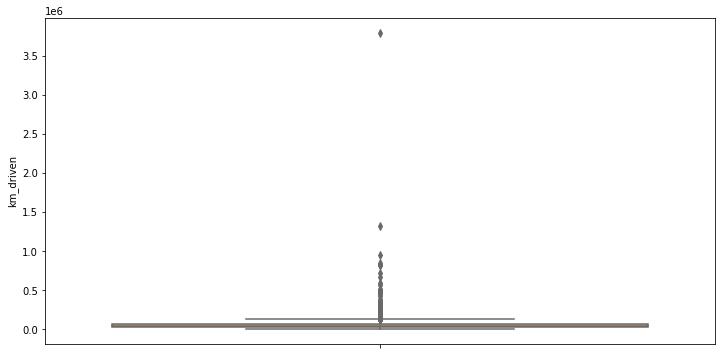

In [361]:
plt.figure(figsize=(12,6))
sns.boxplot(y = "km_driven", data=dataset, palette="Set3_r");

In [362]:
for i in range(0,100,10):
    var =dataset["km_driven"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 100
10 percentile value is 15000
20 percentile value is 25000
30 percentile value is 34400
40 percentile value is 41000
50 percentile value is 50000
60 percentile value is 58719
70 percentile value is 67000
80 percentile value is 78000
90 percentile value is 98000
100 percentile value is  3800000


In [363]:
for i in range(90,100):
    var = dataset["km_driven"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 98000
91 percentile value is 100000
92 percentile value is 104000
93 percentile value is 110000
94 percentile value is 114000
95 percentile value is 120000
96 percentile value is 120000
97 percentile value is 131000
98 percentile value is 150000
99 percentile value is 180000
100 percentile value is  3800000


In [364]:
for i in np.arange(0.0, 1.0, 0.1):
    var = dataset["km_driven"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 180000
99.1 percentile value is 186000
99.2 percentile value is 190000
99.3 percentile value is 198000
99.4 percentile value is 200000
99.5 percentile value is 211121
99.6 percentile value is 225000
99.7 percentile value is 260000
99.8 percentile value is 310000
99.9 percentile value is 480000
100 percentile value is  3800000


In [365]:
# removing the outliers based on 99th percentile value
dataset = dataset[dataset["km_driven"]< 3800000]
dataset

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15405,Hyundai Grand,Hyundai,Grand,6.893599e+05,7.248791e+05,5,9229,Dealer,Petrol,Manual,18.90,1197,82.00,5,545000
15406,Hyundai i10,Hyundai,i10,6.983200e+05,7.293333e+05,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,9.267760e+05,1.149968e+06,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,8.926327e+05,1.563551e+06,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000


***Checking min_cost_price outliers***

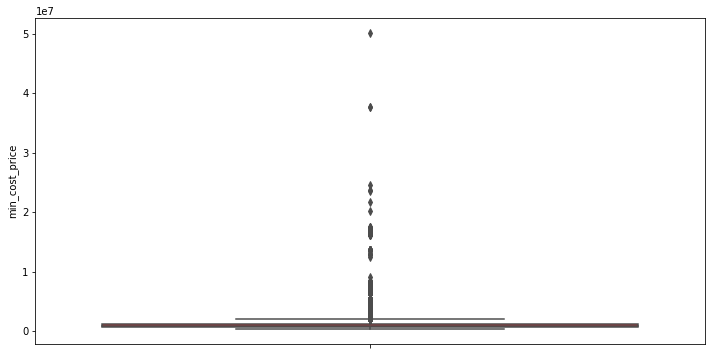

In [366]:
plt.figure(figsize=(12,6))
sns.boxplot(y = "min_cost_price", data=dataset, palette="Set1")

In [367]:
for i in range(0,100,10):
    var =dataset["min_cost_price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 311000.0
10 percentile value is 512000.0
20 percentile value is 629140.522875817
30 percentile value is 675762.048192771
40 percentile value is 706000.0
50 percentile value is 848000.0
60 percentile value is 933000.0
70 percentile value is 1089000.0
80 percentile value is 1334000.0
90 percentile value is 2017158.73015873
100 percentile value is  50100000.0


In [368]:
for i in range(90,100):
    var = dataset["min_cost_price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 2017158.73015873
91 percentile value is 2080000.0
92 percentile value is 2820000.0
93 percentile value is 3619450.98039215
94 percentile value is 3912000.0
95 percentile value is 4968897.43589743
96 percentile value is 5104000.0
97 percentile value is 5230000.0
98 percentile value is 7320000.0
99 percentile value is 7609000.0
100 percentile value is  50100000.0


In [369]:
for i in np.arange(0.0, 1.0, 0.1):
    var = dataset["min_cost_price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 7609000.0
99.1 percentile value is 7673000.0
99.2 percentile value is 7827000.0
99.3 percentile value is 7905000.0
99.4 percentile value is 8209000.0
99.5 percentile value is 13700000.0
99.6 percentile value is 16100000.0
99.7 percentile value is 16503125.0
99.8 percentile value is 16737142.8571428
99.9 percentile value is 17100000.0
100 percentile value is  50100000.0


In [370]:
data[data["min_cost_price"] == 50100000.0]

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3799,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,50100000.0,58400000.0,2,3800,Dealer,Petrol,Automatic,4.0,3855,601.0,4,39500000


***Checking for max_cost_price outliers***

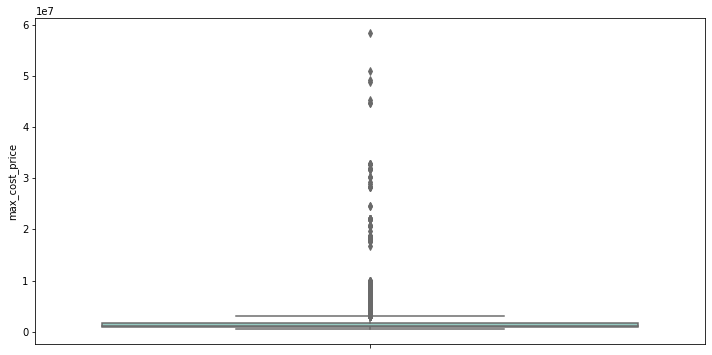

In [371]:
plt.figure(figsize=(12,6))
sns.boxplot(y = "max_cost_price", data=dataset, palette="Set3")

In [372]:
for i in range(0,100,10):
    var =dataset["max_cost_price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 436000.0
10 percentile value is 657000.0
20 percentile value is 729333.333333333
30 percentile value is 920202.614379085
40 percentile value is 1031000.0
50 percentile value is 1150549.70760233
60 percentile value is 1328000.0
70 percentile value is 1631000.0
80 percentile value is 1889000.0
90 percentile value is 2955126.98412698
100 percentile value is  58400000.0


In [373]:
for i in range(90,100):
    var = dataset["max_cost_price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 2955126.98412698
91 percentile value is 2959000.0
92 percentile value is 3409000.0
93 percentile value is 4131000.0
94 percentile value is 4522000.0
95 percentile value is 5370000.0
96 percentile value is 5756000.0
97 percentile value is 6463000.0
98 percentile value is 8223000.0
99 percentile value is 9401000.0
100 percentile value is  58400000.0


In [374]:
for i in np.arange(0.0, 1.0, 0.1):
    var = dataset["max_cost_price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 9401000.0
99.1 percentile value is 9480000.0
99.2 percentile value is 9529000.0
99.3 percentile value is 9561000.0
99.4 percentile value is 9814000.0
99.5 percentile value is 17800000.0
99.6 percentile value is 18790625.0
99.7 percentile value is 22100000.0
99.8 percentile value is 28200000.0
99.9 percentile value is 31900000.0
100 percentile value is  58400000.0


In [375]:
dataset[dataset["max_cost_price"] == 58400000.0]

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3799,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,50100000.0,58400000.0,2,3800,Dealer,Petrol,Automatic,4.0,3855,601.0,4,39500000


***OBSERVATION:*** The brand Ferrai has min_cost_price and max_cost_power which is considered as outlier by the boxplot but reality the  cost of ferrai cars are maxixmum compared to other Indian cars and much of the oulier cars observed by the boxplot are the foreign brand cars and their buying and selling cost price is more compared to majority of Indian cars present in the dataset and are valid datapoints.

***d) Checking for outliers after removing the outliers***

In [376]:
print(dataset[dataset["seats"] == 0].value_counts())

print(dataset[dataset["vehicle_age"] == 0].value_counts())

print(dataset[dataset["min_cost_price"] > dataset["max_cost_price"]].value_counts())

print(dataset[dataset["mileage"] == 0].value_counts())

print(dataset[dataset["engine"] == 0].value_counts())

print(dataset[dataset["max_power"] == 0].value_counts())





Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)


***CHECK FOR MULTICOLLINEARITY***

***Definition***

Multicollinearity is a condition in which there is association or significant dependence of independent features. If the correlation between any two independent features is high then there is a problemn of multicollinearity.

***Problemn of multicollinearity.***

If multicollinearity exists in the regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable

***How to detect multicollinearity?*** 

The best way to detect multicollinearity is by Variance Inflation Factor (VIF). It tells how well a independent variable can be explained by the other independent variable.

$ VIF = 1 / (1 - R^2)$

$ R^2  = coefficient of  determination$

If VIF exceeds 5 or 10 it indicates high multicollinearity between the  independent variable and the others




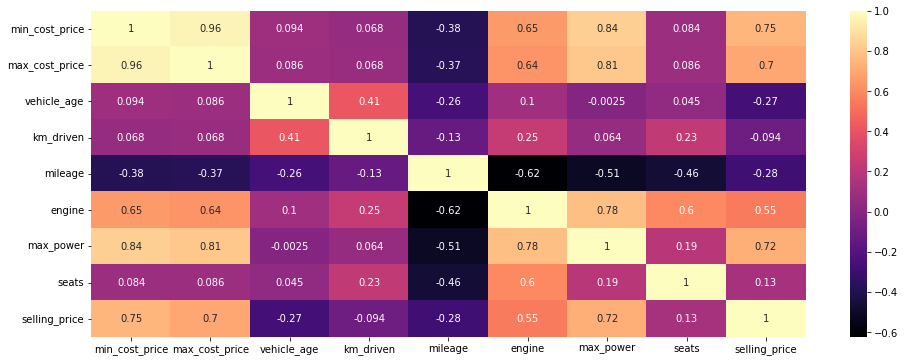

In [377]:
#plotting the heat map
dataset_corr = dataset.corr()
plt.figure(figsize = (16,6))

sns.heatmap(dataset_corr ,annot = True,cmap = "magma")


OBSERVATION:

Many of the independent features are highly correlated.

***Calculating VIF value for each feature.***

In [378]:
import statsmodels.api as sm
# taking only the numerical features
dataset1 = dataset[[
        'min_cost_price','max_cost_price','vehicle_age', 'km_driven','mileage','max_power',
         'engine','seats']]
names = list(dataset1.columns)


In [379]:
#source code : https://github.com/bhattbhavesh91/GA_Sessions/blob/master/ga_dsmp_5jan2019/21_variance_inflation_factor_vif_for_multicolinearity.ipynb
for i in range(0, len(names)):
    y = dataset1.loc[:, dataset1.columns == names[i]]
    x = dataset1.loc[:, dataset1.columns != names[i]]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            names[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            names[i], vif)
        )

R Square value of min_cost_price column is 0.96 keeping all other columns as features
Variance Inflation Factor of min_cost_price column is 26.4 

R Square value of max_cost_price column is 0.96 keeping all other columns as features
Variance Inflation Factor of max_cost_price column is 22.24 

R Square value of vehicle_age column is 0.82 keeping all other columns as features
Variance Inflation Factor of vehicle_age column is 5.68 

R Square value of km_driven column is 0.72 keeping all other columns as features
Variance Inflation Factor of km_driven column is 3.61 

R Square value of mileage column is 0.94 keeping all other columns as features
Variance Inflation Factor of mileage column is 16.27 

R Square value of max_power column is 0.97 keeping all other columns as features
Variance Inflation Factor of max_power column is 35.92 

R Square value of engine column is 0.98 keeping all other columns as features
Variance Inflation Factor of engine column is 58.34 

R Square value of seats

OBSERVATION:

Seats and engine have high VIF value compared to other features. For majority of features VIF value is greater than 10 which means features are highly correlated and there there is a cause for concern.

***Removing the highly correlated features***

In [380]:
x1 =dataset["max_power"]
x2 =dataset["engine"]
corr, _ = pearsonr(x1, x2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.784


In [381]:
x1 = dataset["max_power"]
x2 = dataset["selling_price"]
corr, _ = pearsonr(x1, x2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.724


In [382]:
x1 = dataset["selling_price"]
x2 = dataset["engine"]
corr, _ = pearsonr(x1, x2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.552


OBSERVATION:

1) Since max_power and engine have a strong positive correlation of 0.807 there may be chances of collinearity.

2) The correlation values of max_power and engine with the output variable selling price are 0.750 and 0.586 respectively, we can drop engine column from further analysis and modelling since it has low correlartion value with selling price compared to max_power

In [383]:
x1 = dataset["max_power"]
x2 = dataset["max_cost_price"]
corr, _ = pearsonr(x1, x2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.811


In [384]:
x1 = dataset["max_power"]
x2 = dataset["selling_price"]
corr, _ = pearsonr(x1, x2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.724


In [385]:
x1 = dataset["selling_price"]
x2 = dataset["max_cost_price"]
corr, _ = pearsonr(x1, x2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.697


OBSERVATION:

Since max_power and max_cost_price have nearly equal correlation with the output variable. I'm dropping max_power since it's difficult to obtain for the users while predicting the price of cars than obtaining max_cost price is easy which is nothing but the buying value.

In [386]:
x1 =dataset["min_cost_price"]
x2 =dataset["max_cost_price"]
corr, _ = pearsonr(x1, x2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.965


In [387]:
x1 = dataset["min_cost_price"]
x2 = dataset["selling_price"]
corr, _ = pearsonr(x1, x2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.746


In [388]:
x1 = dataset["max_cost_price"]
x2 = dataset["selling_price"]
corr, _ = pearsonr(x1, x2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.697


OBSERVATION:

max_cost_price and min_cost_price are highly correlated with each other with the value 0.968 and that  with the output variable 0.724 and 0.770 respectively. I wish to drop the min_cost_price because many  of the new car buyers will prefer to  buy slightly higher version models than the base models.

In [389]:
x1 =dataset["mileage"]
x2 =dataset["seats"]
corr, _ = pearsonr(x1, x2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.462


In [390]:
x1 = dataset["mileage"]
x2 = dataset["selling_price"]
corr, _ = pearsonr(x1, x2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.278


In [391]:
x1 = dataset["seats"]
x2 = dataset["selling_price"]
corr, _ = pearsonr(x1, x2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.129


OBSERVATION:

mileage and seats are highly correlated to each other. So I will be droping mileage and keep number of seats, as getting exact milage a car gives is very difficult for the users to get while predicting than the number of seats.

# ***DATA PREPROCESSING***

In [392]:
final_dataset = dataset[['car_name','brand','max_cost_price','vehicle_age', 'km_driven', 'seller_type','fuel_type', 'transmission_type','seats', 'selling_price']]
final_dataset

,car_name,brand,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,seats,selling_price
0,Maruti Alto,Maruti,4.654015e+05,9,120000,Individual,Petrol,Manual,5,120000
1,Hyundai Grand,Hyundai,7.480000e+05,5,20000,Individual,Petrol,Manual,5,550000
2,Hyundai i20,Hyundai,1.307926e+06,11,60000,Individual,Petrol,Manual,5,215000
3,Maruti Alto,Maruti,4.654015e+05,9,37000,Individual,Petrol,Manual,5,226000
4,Ford Ecosport,Ford,1.379000e+06,6,30000,Dealer,Diesel,Manual,5,570000
...,...,...,...,...,...,...,...,...,...,...
15405,Hyundai Grand,Hyundai,7.248791e+05,5,9229,Dealer,Petrol,Manual,5,545000
15406,Hyundai i10,Hyundai,7.293333e+05,9,10723,Dealer,Petrol,Manual,5,250000
15407,Maruti Ertiga,Maruti,1.149968e+06,2,18000,Dealer,Petrol,Manual,7,925000
15408,Skoda Rapid,Skoda,1.563551e+06,6,67000,Dealer,Diesel,Manual,5,425000


In [393]:
final_dataset.shape

(14837, 10)

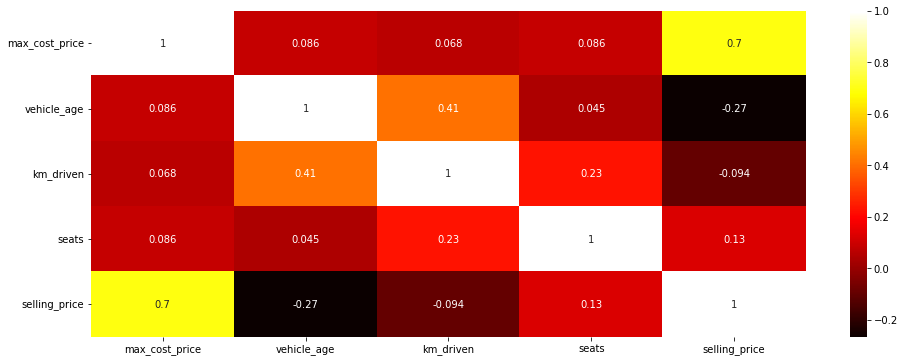

In [394]:
final_dataset_mat = final_dataset.corr()
plt.figure(figsize = (16,6))

sns.heatmap(final_dataset_mat ,annot = True,cmap = "hot")


OBSERVATION:

All the independent numerical/continuous features are less correlated to each other.

NOTE: "km_driven" has nearly 0 correlation with the selling price. But in reality the price of second hand cars depends on the km driven so I'm keeping the feature for further modelling. Since sometimes correlation  is not causation.

***Checking for VIF value for the final dataset***

In [395]:
dataset2 = dataset[[
        'max_cost_price','vehicle_age', 'km_driven','seats']]

names = list(dataset2.columns)

In [396]:
for i in range(0, len(names)):
    y = dataset2.loc[:, dataset2.columns == names[i]]
    x = dataset2.loc[:, dataset2.columns != names[i]]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            names[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            names[i], vif)
        )

R Square value of max_cost_price column is 0.35 keeping all other columns as features
Variance Inflation Factor of max_cost_price column is 1.55 

R Square value of vehicle_age column is 0.82 keeping all other columns as features
Variance Inflation Factor of vehicle_age column is 5.59 

R Square value of km_driven column is 0.71 keeping all other columns as features
Variance Inflation Factor of km_driven column is 3.4 

R Square value of seats column is 0.82 keeping all other columns as features
Variance Inflation Factor of seats column is 5.47 



OBSERVATION:

All the features of final dataset used for further modelling have less VIF value which means there is less chances of multicollinearity. Since VIF value for any feature is not above 10 there is no high correlation and there is no cause for concern.

# **MODEL TRAINING**

In [397]:
final_dataset

,car_name,brand,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,seats,selling_price
0,Maruti Alto,Maruti,4.654015e+05,9,120000,Individual,Petrol,Manual,5,120000
1,Hyundai Grand,Hyundai,7.480000e+05,5,20000,Individual,Petrol,Manual,5,550000
2,Hyundai i20,Hyundai,1.307926e+06,11,60000,Individual,Petrol,Manual,5,215000
3,Maruti Alto,Maruti,4.654015e+05,9,37000,Individual,Petrol,Manual,5,226000
4,Ford Ecosport,Ford,1.379000e+06,6,30000,Dealer,Diesel,Manual,5,570000
...,...,...,...,...,...,...,...,...,...,...
15405,Hyundai Grand,Hyundai,7.248791e+05,5,9229,Dealer,Petrol,Manual,5,545000
15406,Hyundai i10,Hyundai,7.293333e+05,9,10723,Dealer,Petrol,Manual,5,250000
15407,Maruti Ertiga,Maruti,1.149968e+06,2,18000,Dealer,Petrol,Manual,7,925000
15408,Skoda Rapid,Skoda,1.563551e+06,6,67000,Dealer,Diesel,Manual,5,425000


In [398]:
final_dataset.columns

Index(['car_name', 'brand', 'max_cost_price', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'seats',
       'selling_price'],
      dtype='object')

***Splitting the dataset:***

 here I have used random splitting since the dataset does not vary on time

In [399]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_dataset.drop(columns = ["selling_price"]),final_dataset["selling_price"],test_size = 0.2, random_state = 0)



In [400]:
print(X_train)



             car_name    brand  max_cost_price  vehicle_age  km_driven  \
2713    Toyota Innova   Toyota    3.010000e+06            5      53380   
7418   Maruti Wagon R   Maruti    6.917691e+05            9      53000   
3878    Maruti Vitara   Maruti    1.323333e+06            4      34000   
3736    Hyundai Verna  Hyundai    1.645000e+06            8      97000   
13894   Hyundai Creta  Hyundai    1.975000e+06            5      56000   
...               ...      ...             ...          ...        ...   
13632  Maruti Wagon R   Maruti    7.070000e+05            4      27500   
3413     Renault KWID  Renault    6.540000e+05            3       9800   
10185     Hyundai i10  Hyundai    7.293333e+05            7      60000   
11193      Honda City    Honda    1.755000e+06            6      60000   
2851     Renault KWID  Renault    6.650000e+05            5      25600   

      seller_type fuel_type transmission_type  seats  
2713       Dealer    Diesel         Automatic      8  
7

In [401]:
X_test

,car_name,brand,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,seats
12494,Hyundai i20,Hyundai,1.341000e+06,5,41000,Dealer,Petrol,Manual,5
8408,Renault Duster,Renault,1.690333e+06,9,130000,Individual,Diesel,Manual,5
9835,Maruti Ciaz,Maruti,1.340180e+06,4,47000,Dealer,Diesel,Manual,5
4368,Maruti Baleno,Maruti,1.054133e+06,1,1001,Dealer,Petrol,Automatic,5
5263,Mahindra Thar,Mahindra,1.703000e+06,3,25000,Individual,Diesel,Manual,6
...,...,...,...,...,...,...,...,...,...
14057,Toyota Innova,Toyota,3.010000e+06,3,35311,Dealer,Diesel,Manual,8
2430,Toyota Fortuner,Toyota,4.522000e+06,6,11500,Dealer,Diesel,Manual,7
8064,Hyundai i20,Hyundai,1.307926e+06,3,25000,Dealer,Petrol,Manual,5
497,Hyundai Grand,Hyundai,7.248791e+05,6,70000,Individual,Diesel,Manual,5


In [402]:
y_train

2713     1650000
7418      275000
3878      950000
3736      510000
13894     875000
          ...   
13632     440000
3413      415000
10185     298000
11193     595000
2851      280000
Name: selling_price, Length: 11869, dtype: int64

In [403]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11869, 9)
(2968, 9)
(11869,)
(2968,)


***Standardising the data and encoding the categorical variables***

It is very important to standardise the data in order to overcome the mathematical and logical errors.Standardisation of data is very important for the models which depends on distance measures like Euclidean,Manhattan etc.


In [404]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [405]:
X_train = pd.DataFrame(X_train, columns = ['car_name', 'brand', 'max_cost_price', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'seats'])

X_test = pd.DataFrame(X_test,columns = ['car_name', 'brand', 'max_cost_price', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'seats'])
X_train.head()

,car_name,brand,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,seats
2713,Toyota Innova,Toyota,3.010000e+06,5,53380,Dealer,Diesel,Automatic,8
7418,Maruti Wagon R,Maruti,6.917691e+05,9,53000,Dealer,Petrol,Manual,5
3878,Maruti Vitara,Maruti,1.323333e+06,4,34000,Dealer,Diesel,Manual,5
3736,Hyundai Verna,Hyundai,1.645000e+06,8,97000,Dealer,Petrol,Manual,5
13894,Hyundai Creta,Hyundai,1.975000e+06,5,56000,Individual,Diesel,Manual,5


In [406]:
X_test.head()

,car_name,brand,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,seats
12494,Hyundai i20,Hyundai,1.341000e+06,5,41000,Dealer,Petrol,Manual,5
8408,Renault Duster,Renault,1.690333e+06,9,130000,Individual,Diesel,Manual,5
9835,Maruti Ciaz,Maruti,1.340180e+06,4,47000,Dealer,Diesel,Manual,5
4368,Maruti Baleno,Maruti,1.054133e+06,1,1001,Dealer,Petrol,Automatic,5
5263,Mahindra Thar,Mahindra,1.703000e+06,3,25000,Individual,Diesel,Manual,6


In [407]:

from category_encoders import BinaryEncoder
encoder = BinaryEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


                                       

In [408]:
X_train.head()

,car_name_0,car_name_1,car_name_2,car_name_3,car_name_4,car_name_5,car_name_6,brand_0,brand_1,brand_2,...,vehicle_age,km_driven,seller_type_0,seller_type_1,fuel_type_0,fuel_type_1,fuel_type_2,transmission_type_0,transmission_type_1,seats
2713,0,0,0,0,0,0,1,0,0,0,...,5,53380,0,1,0,0,1,0,1,8
7418,0,0,0,0,0,1,0,0,0,0,...,9,53000,0,1,0,1,0,1,0,5
3878,0,0,0,0,0,1,1,0,0,0,...,4,34000,0,1,0,0,1,1,0,5
3736,0,0,0,0,1,0,0,0,0,0,...,8,97000,0,1,0,1,0,1,0,5
13894,0,0,0,0,1,0,1,0,0,0,...,5,56000,1,0,0,0,1,1,0,5


In [409]:
X_test.head()

,car_name_0,car_name_1,car_name_2,car_name_3,car_name_4,car_name_5,car_name_6,brand_0,brand_1,brand_2,...,vehicle_age,km_driven,seller_type_0,seller_type_1,fuel_type_0,fuel_type_1,fuel_type_2,transmission_type_0,transmission_type_1,seats
12494,0,0,1,0,1,1,1,0,0,0,...,5,41000,0,1,0,1,0,1,0,5
8408,0,0,1,0,1,1,0,0,0,1,...,9,130000,1,0,0,0,1,1,0,5
9835,0,0,1,1,0,0,1,0,0,0,...,4,47000,0,1,0,0,1,1,0,5
4368,0,1,0,0,0,0,1,0,0,0,...,1,1001,0,1,0,1,0,0,1,5
5263,0,1,0,1,0,1,1,0,1,0,...,3,25000,1,0,0,0,1,1,0,6


In [410]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
scaling_transformer = ColumnTransformer(transformers = [
    ("tnf", StandardScaler(), ["max_cost_price","vehicle_age","km_driven","seats"])
],remainder = "passthrough")

In [411]:
X_train = scaling_transformer.fit_transform(X_train)
X_test = scaling_transformer.transform(X_test)

In [412]:
X_train[0]

array([ 0.50526323, -0.34442502, -0.04451462,  3.38319655,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ])

In [413]:
y_train = y_train.values.reshape(-1,1)
print(y_train.shape)
y_test = y_test.values.reshape(-1,1)
print(y_test.shape)

(11869, 1)
(2968, 1)


In [414]:
sc = StandardScaler()
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

In [415]:
features = ["max_cost_price","vehicle_age","km_driven","seats",'car_name_0', 'car_name_1', 'car_name_2', 'car_name_3', 'car_name_4',
       'car_name_5', 'car_name_6', 'brand_0', 'brand_1', 'brand_2', 'brand_3',
       'brand_4','seller_type_0', 'seller_type_1', 'fuel_type_0', 'fuel_type_1',
       'fuel_type_2', 'transmission_type_0', 'transmission_type_1']


***BUILDING THE BASE LINE REGRESSION MODEL***

Baseline can be referred to the predicted outcomes  without running the dataset through any predictive model.

a) For regression “mean” can be used as a baseline model

b) For classification “mode” can be used as a baseline model. 

Since my project is a regression problem I will be using mean as a baseline model


In [416]:
from sklearn.metrics import  median_absolute_error, r2_score

In [417]:
print("For test dataset\n")
guess_train = y_train.mean()
guess_train

y_pred_train = [guess_train] * len(y_train)

from sklearn.metrics import mean_absolute_error,mean_squared_error
median_error = mean_absolute_error(y_train,y_pred_train).round(2)
print("Median Absolute Error:", median_error)
rsquared0 = r2_score(y_train, y_pred_train).round(2)
print("R Squared:",rsquared0 )


print("------------------------------------------------------------------------------------------------------\n")
print("For test dataset\n")

guess_test = y_test.mean()
guess_test
y_pred_test = [guess_test] * len(y_test)
median_error = mean_absolute_error(y_test,y_pred_test).round(2)
print("Median Absolute Error:", median_error)
rsquared0 = r2_score(y_test, y_pred_test).round(2)
print("R Squared:",rsquared0 )





For test dataset

Median Absolute Error: 0.49
R Squared: 0.0
------------------------------------------------------------------------------------------------------

For test dataset

Median Absolute Error: 0.48
R Squared: 0.0


***LINEAR REGRESSION***

In [418]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
m1 = linear_regressor.fit(X_train, y_train)

In [419]:
from sklearn.model_selection import cross_val_score
#10 fold cross validation
scores = cross_val_score(m1 , X_train, y_train, scoring = "r2",cv = 10)
scores

array([0.69585989, 0.63955408, 0.6860003 , 0.51417994, 0.6357264 ,
       0.71474093, 0.41533802, 0.68149254, 0.7465578 , 0.67958755])

In [420]:
print(np.mean(scores))

0.6409037459512572


In [421]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_score(linear_regressor, X_test,y_test, cv = 10,scoring = "r2")
pred

array([0.78226817, 0.72022225, 0.67887021, 0.51825769, 0.68794306,
       0.71782514, 0.68969241, 0.73771902, 0.73988837, 0.75607415])

In [422]:
np.mean(pred)

0.7028760470874345

In [423]:
y_pred_test1 = linear_regressor.predict(X_test)

In [424]:
print("TRAIN SCORES:\n")
median_error1 = median_absolute_error(y_train,linear_regressor.predict(X_train)).round(2)
print("Median Absolute Error:",median_error1)
rsquared1 = r2_score(y_train,linear_regressor.predict(X_train)).round(2)
print("R Squared Value:", rsquared1)


print("-------------------------------------------------------------------\n")
print("TEST SCORES:\n")
median_error1 = median_absolute_error(y_test,y_pred_test1).round(2)
print("Median Absolute Error:",median_error1)
r_squared1_test = r2_score(y_test,y_pred_test1).round(2)
print("R Squared Value:", r_squared1_test)

TRAIN SCORES:

Median Absolute Error: 0.14
R Squared Value: 0.64
-------------------------------------------------------------------

TEST SCORES:

Median Absolute Error: 0.14
R Squared Value: 0.72


Text(0, 0.5, 'Predicted values (y_pred)')

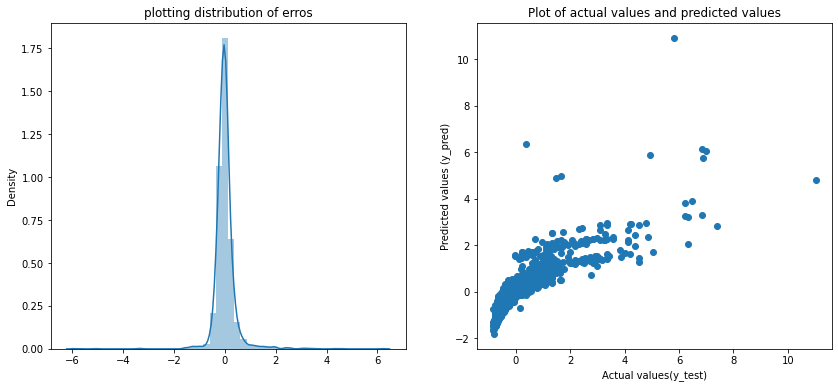

In [425]:

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.distplot(y_test - y_pred_test1)
plt.title("plotting distribution of erros")


plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test1)
plt.title("Plot of actual values and predicted values")
plt.xlabel("Actual values(y_test)")
plt.ylabel("Predicted values (y_pred)")




1) The distributions of errors is somewhat normal distributed.

2) When we plot actual v/s predicted in figure 2 the plot is not linear  which means that the prediction od the model is not good

***LASSO REGRESSION***

In [426]:
from sklearn.linear_model import Lasso
lasso_regressor = Lasso()
lasso_regressor.fit(X_train,y_train)
m2 = lasso_regressor.fit(X_train,y_train)

In [427]:
from sklearn.model_selection import cross_val_score
#10 fold cross validation
scores = cross_val_score(m2 , X_train, y_train, scoring = "r2",cv = 10)
scores
print(np.mean(scores))

-0.002671011509922927


In [428]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_score(lasso_regressor, X_test,y_test, cv = 10,scoring = "r2")
pred
np.mean(pred)

-0.0031309409405490653

In [429]:
lasso_regressor.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [430]:
alpha = [i for i in range(0,10)]
param_dist = {
    "alpha": alpha
}

In [431]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = lasso_regressor, param_distributions = param_dist,scoring = "neg_median_absolute_error", cv = 10, verbose=2, n_jobs = 4)
random_search.fit(X_train,y_train)

print(random_search.best_params_)
# print how our model looks after hyper-parameter tuning
#print(random_search.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'alpha': 0}


In [432]:
lasso_regressor = Lasso(alpha = 0)
lasso_regressor.fit(X_train,y_train)

Lasso(alpha=0)

In [433]:
y_pred_test11 = lasso_regressor.predict(X_test)

In [434]:
print("TRAIN SCORES:")
median_error1 = median_absolute_error(y_train,lasso_regressor.predict(X_train)).round(2)
print("Median Absolute Error:",median_error1)
r_squared1 = r2_score(y_train,lasso_regressor.predict(X_train)).round(2)
print("R Squared Value:", r_squared1)

print("-------------------------------------------------------------------\n")
print("TEST SCORES:\n")
median_error11 = median_absolute_error(y_test,y_pred_test11).round(2)
print("Median Absolute Error:",median_error11)
r_squared11_test = r2_score(y_test,y_pred_test11).round(2)
print("R Squared Value:", r_squared11_test)

TRAIN SCORES:
Median Absolute Error: 0.14
R Squared Value: 0.64
-------------------------------------------------------------------

TEST SCORES:

Median Absolute Error: 0.14
R Squared Value: 0.72


Text(0, 0.5, 'Predicted values (y_pred)')

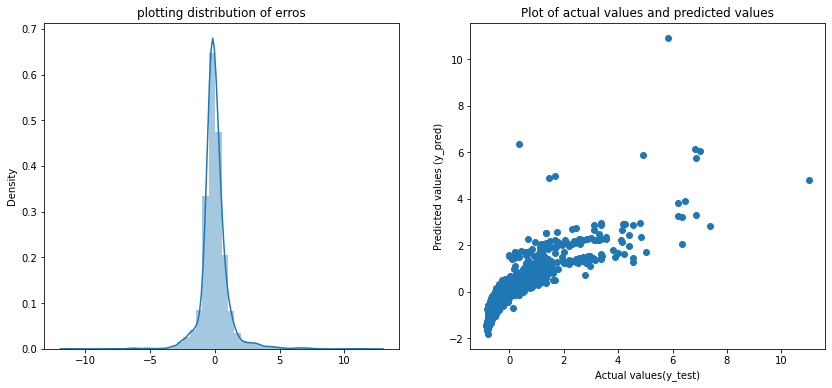

In [435]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.distplot(y_test - y_pred_test11)
plt.title("plotting distribution of erros")

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test11)
plt.title("Plot of actual values and predicted values")
plt.xlabel("Actual values(y_test)")
plt.ylabel("Predicted values (y_pred)")



1) The distributions of errors is somewhat normal distributed.

2) When we plot actual v/s predicted in figure 2 the plot is not linear which means that the prediction of the model is not good

***RIDGE REGRESSION***

In [436]:
from sklearn.linear_model import Ridge
ridge_regressor = Ridge()
ridge_regressor.fit(X_train,y_train)

Ridge()

In [437]:
m3= ridge_regressor.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
#10 fold cross validation
scores = cross_val_score(m3 , X_train, y_train, scoring = "r2",cv = 10)
scores
print(np.mean(scores))

0.6409299674235907


In [438]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_score(ridge_regressor, X_test,y_test, cv = 10,scoring = "r2")
pred
np.mean(pred)

0.7029660254278678

In [439]:
ridge_regressor.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [440]:
alpha = [i for i in range(0,10)]
param_dist = {
    "alpha": alpha
}

In [441]:
from sklearn.model_selection import RandomizedSearchCV
#random_search = RandomizedSearchCV(estimator = ridge_regressor, param_distributions = param_dist, cv = 10, verbose=2, n_jobs = -1)
#random_search.fit(X_train,y_train)

print(random_search.best_params_)
# print how our model looks after hyper-parameter tuning
#print(random_search.best_estimator_)

{'alpha': 0}


In [442]:
ridge_regressor = Ridge(alpha = 9)
ridge_regressor.fit(X_train,y_train)

Ridge(alpha=9)

In [443]:
y_pred_test12 = ridge_regressor.predict(X_test)

In [444]:
print("TRAIN SCORES:")
median_error1 = median_absolute_error(y_train,ridge_regressor.predict(X_train)).round(2)
print("Median Absolute Error:",median_error1)
r_squared1 = r2_score(y_train,ridge_regressor.predict(X_train)).round(2)
print("R Squared Value:", r_squared1)

print("-------------------------------------------------------------------\n")
print("TEST SCORES:\n")
median_error12 = median_absolute_error(y_test,y_pred_test12).round(2)
print("Median Absolute Error:",median_error12)
r_squared12_test = r2_score(y_test,y_pred_test12).round(2)
print("R Squared Value:", r_squared12_test)

TRAIN SCORES:
Median Absolute Error: 0.14
R Squared Value: 0.64
-------------------------------------------------------------------

TEST SCORES:

Median Absolute Error: 0.14
R Squared Value: 0.72


Text(0, 0.5, 'Predicted values (y_pred)')

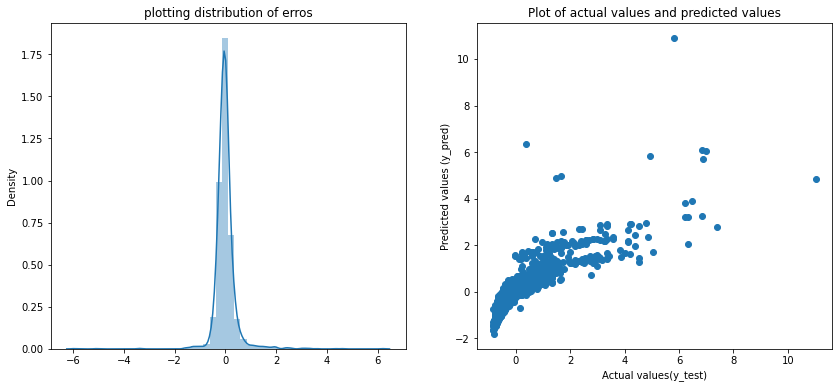

In [445]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.distplot(y_test - y_pred_test12)
plt.title("plotting distribution of erros")

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test12)
plt.title("Plot of actual values and predicted values")
plt.xlabel("Actual values(y_test)")
plt.ylabel("Predicted values (y_pred)")



1) The distributions of errors looks like normal distributed.

2) When we plot actual v/s predicted in figure 2 the plot is not linear which means that the prediction of the model is not good

***DECISION TREE REGRESSOR***

In [446]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(random_state = 0)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [447]:
y_pred = decision_regressor.predict(X_test)
r = r2_score(y_test,y_pred)
r

0.9154813578660544

In [448]:
m5 = decision_regressor.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
#10 fold cross validation
scores = cross_val_score(m5, X_train, y_train, scoring = "r2",cv = 10)
scores
print(np.mean(scores))

0.8472549733636642


In [449]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_score(decision_regressor, X_test,y_test, cv = 10,scoring = "r2")
pred
np.mean(pred)

0.8343233287293771

In [450]:
decision_regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [451]:
ccp_alpha=[0.1,0.2,0.3,0.4]
criterion = ['squared_error']
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [i for i in range(25,50)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5,6,4,3,7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3,4,5]


In [452]:
param_grid = {'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'ccp_alpha': ccp_alpha}
print(param_grid)

{'criterion': ['squared_error'], 'max_features': ['auto', 'sqrt'], 'max_depth': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'min_samples_split': [2, 5, 6, 4, 3, 7], 'min_samples_leaf': [1, 2, 3, 4, 5], 'ccp_alpha': [0.1, 0.2, 0.3, 0.4]}


In [453]:
#from sklearn.model_selection import RandomizedSearchCV
#random_search = RandomizedSearchCV(estimator = decision_regressor, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = -1)
#random_search.fit(X_train,y_train)
#print ("best parameter after tuning")
#print(random_search.best_params_)
#print ("how our model looks after hyper-parameter tuning")
#print(random_search.best_estimator_)


In [454]:
decision_regressor = DecisionTreeRegressor(ccp_alpha=0.1, max_depth=30, max_features='sqrt',
                      min_samples_split=3, random_state=0)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.1, max_depth=30, max_features='sqrt',
                      min_samples_split=3, random_state=0)

In [455]:
y_pred_test3 = decision_regressor.predict(X_test)

In [456]:
print("TRAIN ERROR:\n")
median_error3 = median_absolute_error(y_train,decision_regressor.predict(X_train)).round(2)
print("Median Absolute Error:",median_error3)
r_squared3 = r2_score(y_train,decision_regressor.predict(X_train)).round(2)
print("R Squared Value:", r_squared3)

print("------------------------------------------------------------------------------\n")

print("TEST ERROR:\n")
median_error3 = median_absolute_error(y_test,y_pred_test3).round(2)
print("Median Absolute Error:",median_error3)
r_squared3_test = r2_score(y_test,y_pred_test3).round(2)
print("R Squared Value:", r_squared3_test)

TRAIN ERROR:

Median Absolute Error: 0.26
R Squared Value: 0.23
------------------------------------------------------------------------------

TEST ERROR:

Median Absolute Error: 0.26
R Squared Value: 0.32


Text(0, 0.5, 'Predicted values (y_pred)')

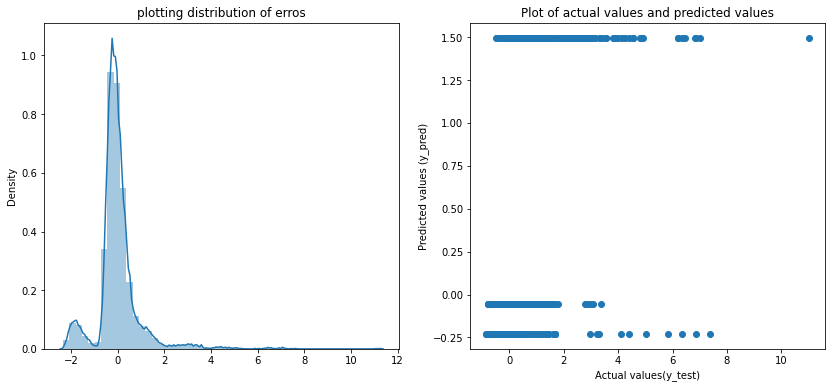

In [457]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.distplot(y_test - y_pred_test3)
plt.title("plotting distribution of erros")

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test3)
plt.title("Plot of actual values and predicted values")
plt.xlabel("Actual values(y_test)")
plt.ylabel("Predicted values (y_pred)")

1) The graphs of errors is  not normally distributed.

2) When we plot actual v/s predicted in figure 2 the plot is not linear which means that the prediction of the model is not good

***Feature importance by Decision Tree regressor***

In [458]:
imp_features = decision_regressor.feature_importances_
imp_features

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.23345827, 0.        , 0.76654173])

In [459]:
feature_names = features
print(feature_names)
num_features = len(feature_names)
imp_features = decision_regressor.feature_importances_
df_imporatnce = pd.DataFrame({"names":feature_names,"importance":imp_features})
df_importance = df_imporatnce.sort_values("importance",ascending = False).reset_index()
df_importance.head()

['max_cost_price', 'vehicle_age', 'km_driven', 'seats', 'car_name_0', 'car_name_1', 'car_name_2', 'car_name_3', 'car_name_4', 'car_name_5', 'car_name_6', 'brand_0', 'brand_1', 'brand_2', 'brand_3', 'brand_4', 'seller_type_0', 'seller_type_1', 'fuel_type_0', 'fuel_type_1', 'fuel_type_2', 'transmission_type_0', 'transmission_type_1']


,index,names,importance
0,22,transmission_type_1,0.766542
1,20,fuel_type_2,0.233458
2,12,brand_1,0.000000
3,21,transmission_type_0,0.000000
4,19,fuel_type_1,0.000000


Text(0.5, 1.0, 'Feature importance given by Decision tree regressor')

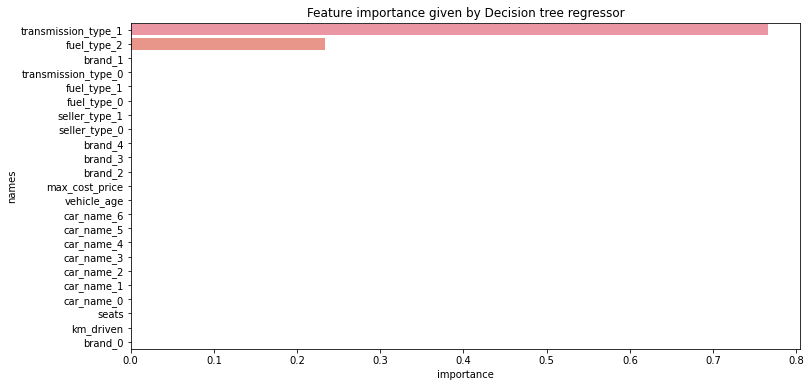

In [460]:
plt.figure(figsize = (12,6))
sns.barplot(x = "importance", y = "names", data = df_importance)
plt.title("Feature importance given by Decision tree regressor")

***RANDOM FOREST REGRESSOR***

In [461]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [462]:
y_pred =random_regressor.predict(X_test) 
r = r2_score(y_test,y_pred)
r

0.954806893028944

In [463]:
m6 = random_regressor.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
#10 fold cross validation
scores = cross_val_score(m6 , X_train, y_train, scoring = "r2",cv = 10)
scores
print(np.mean(scores))

0.9006376522594761


In [464]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_score(random_regressor, X_test,y_test, cv = 10,scoring = "r2")
pred
np.mean(pred)

0.9118240784228341

In [465]:
random_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [466]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [i for i in range(0,30)]
# Minimum number of samples required to split a node
min_samples_split = [1,2,3,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [467]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'min_samples_split': [1, 2, 3, 5], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]}


In [468]:
#random_search= RandomizedSearchCV(estimator = random_regressor, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = 4)
#random_search.fit(X_train,y_train)
#print("best parameter after tuning")
#print(random_search.best_params_)
#print("how our model looks after hyper-parameter tuning")
#print(random_search.best_estimator_)



In [469]:
random_regressor = RandomForestRegressor(max_depth=5, n_estimators=180,min_samples_split=3,min_samples_leaf= 5)
random_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=3,
                      n_estimators=180)

In [470]:
y_pred_test4 = random_regressor.predict(X_test)

In [471]:
print("TRAIN ERROR:\n")
median_error4 = median_absolute_error(y_train,random_regressor.predict(X_train)).round(2)
print("Median Absolute Error:",median_error4)
r_squared4 = r2_score(y_train,random_regressor.predict(X_train)).round(2)
print("R Squared Value:", r_squared4)

print("--------------------------------------------------------------------------------\n")

print("TEST ERROR:\n")
median_error4 = median_absolute_error(y_test,y_pred_test4).round(2)
print("Median Absolute Error:",median_error4)
r_squared4_test = r2_score(y_test,y_pred_test4).round(2)
print("R Squared Value:", r_squared4_test)

TRAIN ERROR:

Median Absolute Error: 0.09
R Squared Value: 0.83
--------------------------------------------------------------------------------

TEST ERROR:

Median Absolute Error: 0.09
R Squared Value: 0.92


Text(0, 0.5, 'Predicted values (y_pred)')

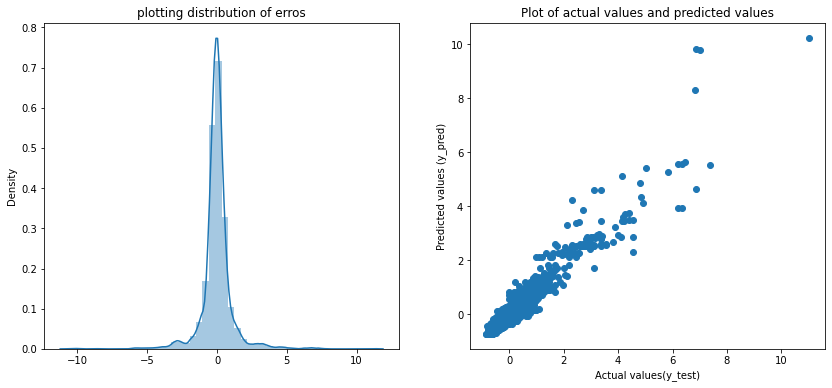

In [472]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.distplot(y_test - y_pred_test4)
plt.title("plotting distribution of erros")

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test4)
plt.title("Plot of actual values and predicted values")
plt.xlabel("Actual values(y_test)")
plt.ylabel("Predicted values (y_pred)")



1) The graph of errors looks like normal distribution

2) The plot is linear which means our prediction is pretty much good

***Feature importance by Random Forest regressor***

In [473]:
imp_features = random_regressor.feature_importances_
imp_features

array([7.37286793e-01, 1.51042356e-01, 9.75891511e-02, 4.38191663e-04,
       3.15495910e-03, 1.92834568e-04, 1.02332102e-03, 7.13734841e-05,
       1.45817561e-06, 1.39369572e-04, 1.01063176e-03, 2.95199965e-05,
       5.73541406e-05, 6.99631143e-03, 0.00000000e+00, 6.37860218e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.23595365e-04,
       7.47552860e-04, 8.22160951e-06, 2.32191247e-05])

In [474]:
feature_names = features
num_features = len(feature_names)
imp_features = random_regressor.feature_importances_
df_imporatnce = pd.DataFrame({"names":feature_names,"importance":imp_features})
df_importance = df_imporatnce.sort_values("importance",ascending = False).reset_index()
df_importance.head()

,index,names,importance
0,0,max_cost_price,0.737287
1,1,vehicle_age,0.151042
2,2,km_driven,0.097589
3,13,brand_2,0.006996
4,4,car_name_0,0.003155


Text(0.5, 1.0, 'Feature importance given by random forest')

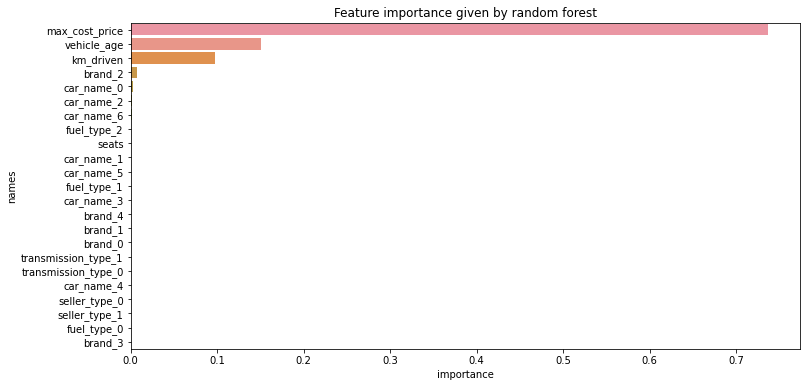

In [475]:
plt.figure(figsize = (12,6))
sns.barplot(x = "importance", y = "names", data = df_importance)
plt.title("Feature importance given by random forest")

***GBDT REGRESSOR***

In [476]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_regressor = GradientBoostingRegressor()
gradient_regressor.fit(X_train,y_train)

GradientBoostingRegressor()

In [477]:
y_pred = gradient_regressor.predict(X_test)
r = r2_score(y_test,y_pred)
r

0.9517835865420602

In [478]:
m7 = gradient_regressor.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
#10 fold cross validation
scores = cross_val_score(m6 , X_train, y_train, scoring = "r2",cv = 10)
scores
print(np.mean(scores))

0.899608766363807


In [479]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_score(gradient_regressor, X_test,y_test, cv = 10,scoring = "r2")
pred
np.mean(pred)

0.929803872683115

In [480]:
gradient_regressor.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [481]:
from scipy.stats import loguniform
param_dist = {
    "n_estimators": [ 100, 200,300,400,500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": loguniform(0.01, 1),
    "max_depth": [i for i in range(0,20)]
}
print(param_dist)

{'n_estimators': [100, 200, 300, 400, 500], 'max_leaf_nodes': [2, 5, 10, 20, 50, 100], 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4f69919210>, 'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


In [482]:
#random_search= RandomizedSearchCV(estimator = gradient_regressor, param_distributions = param_dist, cv = 5, verbose=2, n_jobs = 4)
#random_search.fit(X_train,y_train)
#print("best parameter after tuning")
#print(random_search.best_params_)
#print("how our model looks after hyper-parameter tuning")
#print(random_search.best_estimator_)

In [483]:
gbdt_regressor = GradientBoostingRegressor(learning_rate=0.13911868411221187, max_depth=5,max_leaf_nodes=4)
gbdt_regressor.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.13911868411221187, max_depth=5,
                          max_leaf_nodes=4)

In [484]:
y_pred_test5 = gbdt_regressor.predict(X_test)

In [485]:
print("TRAIN ERROR:\n")
median_error5 = median_absolute_error(y_train, gbdt_regressor.predict(X_train)).round(2)
print("Median Absolute Error:",median_error5)
r_squared5 = r2_score(y_train, gbdt_regressor.predict(X_train)).round(2)
print("R Squared Value:", r_squared5)


print("-------------------------------------------------------------------------------------\n")

print("TEST ERROR:\n")
median_error5 = median_absolute_error(y_test,y_pred_test5).round(2)
print("Median Absolute Error:",median_error5)
r_squared5_test = r2_score(y_test,y_pred_test5).round(2)
print("R Squared Value:", r_squared5_test)

TRAIN ERROR:

Median Absolute Error: 0.08
R Squared Value: 0.96
-------------------------------------------------------------------------------------

TEST ERROR:

Median Absolute Error: 0.08
R Squared Value: 0.94


Text(0, 0.5, 'Predicted values (y_pred)')

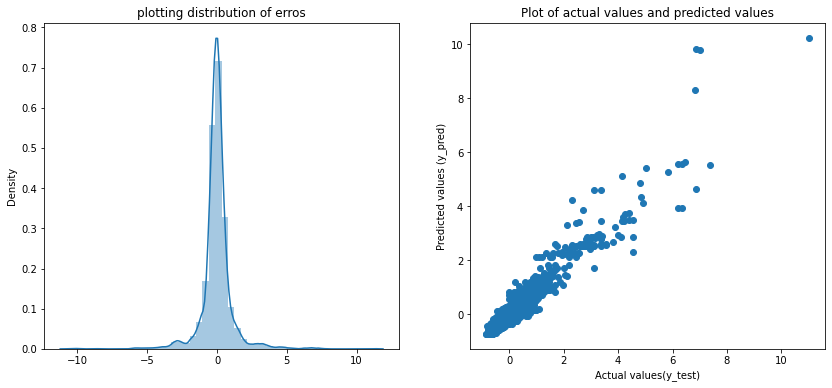

In [486]:

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.distplot(y_test - y_pred_test4)
plt.title("plotting distribution of erros")

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test4)
plt.title("Plot of actual values and predicted values")
plt.xlabel("Actual values(y_test)")
plt.ylabel("Predicted values (y_pred)")



1) The graph of errors looks like normal distribution

2) The plot is linear which means our prediction is pretty much good

***Feature importance of GBDT regressor***

In [487]:
imp_features = gbdt_regressor.feature_importances_
imp_features

array([7.86209448e-01, 1.59717161e-01, 3.79146293e-02, 6.84639673e-03,
       9.56205294e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.85601101e-04, 2.40781500e-04, 0.00000000e+00, 7.90404204e-04,
       6.74752447e-04, 6.48026948e-04, 7.39480783e-05, 2.68786738e-04,
       7.67479997e-05, 0.00000000e+00, 0.00000000e+00, 6.17902234e-04,
       3.48782165e-04, 1.16291502e-03, 3.06751114e-03])

In [488]:
feature_names = features
#feature_names = feature_names[:-1]
num_features = len(feature_names)
imp_features = gbdt_regressor.feature_importances_
df_imporatnce = pd.DataFrame({"names":feature_names,"importance":imp_features})
df_importance = df_imporatnce.sort_values("importance",ascending = False).reset_index()
df_importance.head()

,index,names,importance
0,0,max_cost_price,0.786209
1,1,vehicle_age,0.159717
2,2,km_driven,0.037915
3,3,seats,0.006846
4,22,transmission_type_1,0.003068


Text(0.5, 1.0, 'Feature importance given by GBDT Regressor')

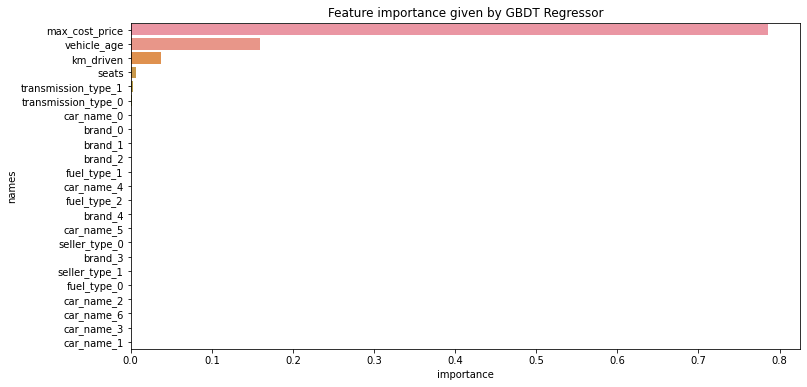

In [489]:
plt.figure(figsize = (12,6))
sns.barplot(x = "importance", y = "names", data = df_importance)
plt.title("Feature importance given by GBDT Regressor")

***XGBOOST REGRESSOR***

In [490]:

import xgboost

In [491]:
xg_regressor =xgboost.XGBRegressor()
xg_regressor.fit(X_train,y_train)

[18:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [492]:
y_pred = xg_regressor.predict(X_test)
r = r2_score(y_test,y_pred).round(2)
r

0.95

In [493]:
m7 = xg_regressor.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
#10 fold cross validation
scores = cross_val_score(m7 , X_train, y_train, scoring = "r2",cv = 10)
scores
print(np.mean(scores))

[18:48:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [494]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_score(xg_regressor, X_test,y_test, cv = 10,scoring = "r2")
pred
np.mean(pred)

[18:48:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

0.9260168032343057

In [495]:
xg_regressor.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [496]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7,0.8,0.9 ]
    
}

In [497]:
#random_search=RandomizedSearchCV(xg_regressor,param_distributions=params,n_iter=5,n_jobs=-1,cv=10,verbose=3)
#random_search.fit(X_train,y_train)
#random_search.best_params_

In [498]:
xg_regressor =xgboost.XGBRegressor(colsample_bytree= 0.8,gamma= 0,learning_rate= 0.10,max_depth= 5,min_child_weight= 5)
xg_regressor.fit(X_train,y_train)

[18:48:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, max_depth=5, min_child_weight=5)

In [499]:
y_pred_test6 = xg_regressor.predict(X_test)

In [500]:
print("TRAIN ERROR:\n")

median_error6 = median_absolute_error(y_train,xg_regressor.predict(X_train)).round(2)
print("Median Absolute Error:",median_error6)
r_squared6 = r2_score(y_train,xg_regressor.predict(X_train)).round(2)
print("R Squared Value:", r_squared6)

print("-----------------------------------------------------------------------\n")
print("TEST ERROR:\n")
median_error6 = median_absolute_error(y_test, y_pred_test6).round(2)
print("Median Absolute Error:",median_error6)
r_squared6_test = r2_score(y_test,y_pred_test6).round(2)
print("R Squared Value:", r_squared6_test)

TRAIN ERROR:

Median Absolute Error: 0.07
R Squared Value: 0.95
-----------------------------------------------------------------------

TEST ERROR:

Median Absolute Error: 0.07
R Squared Value: 0.95


Text(0, 0.5, 'Predicted values (y_pred)')

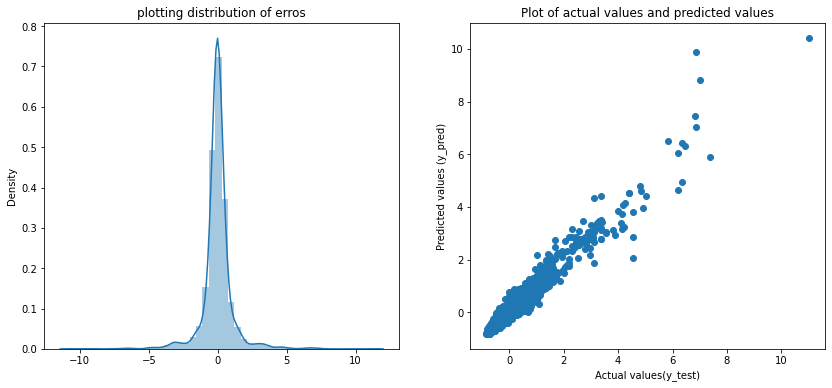

In [501]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.distplot(y_test - y_pred_test6)
plt.title("plotting distribution of erros")

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test6)
plt.title("Plot of actual values and predicted values")
plt.xlabel("Actual values(y_test)")
plt.ylabel("Predicted values (y_pred)")



1) The graph of errors looks like normal distribution

2) The plot is linear which means our prediction is pretty much good

***Feature importance by XGBoost regressor***

In [502]:
imp_features = xg_regressor.feature_importances_
imp_features

array([0.12287509, 0.04795098, 0.05495938, 0.04552045, 0.05495931,
       0.03340944, 0.04096126, 0.0214621 , 0.00399777, 0.01975928,
       0.01508244, 0.15726168, 0.01983764, 0.03320401, 0.01671637,
       0.01863939, 0.00107131, 0.00134266, 0.        , 0.09957534,
       0.02288359, 0.13909511, 0.02943537], dtype=float32)

In [503]:
feature_names = features
#feature_names = feature_names[:-1]
num_features = len(feature_names)
imp_features = xg_regressor.feature_importances_
df_imporatnce = pd.DataFrame({"names":feature_names,"importance":imp_features})
df_importance = df_imporatnce.sort_values("importance",ascending = False).reset_index()
df_importance.head()

,index,names,importance
0,11,brand_0,0.157262
1,21,transmission_type_0,0.139095
2,0,max_cost_price,0.122875
3,19,fuel_type_1,0.099575
4,2,km_driven,0.054959


Text(0.5, 1.0, 'Feature importance given by XGBoost Regressor')

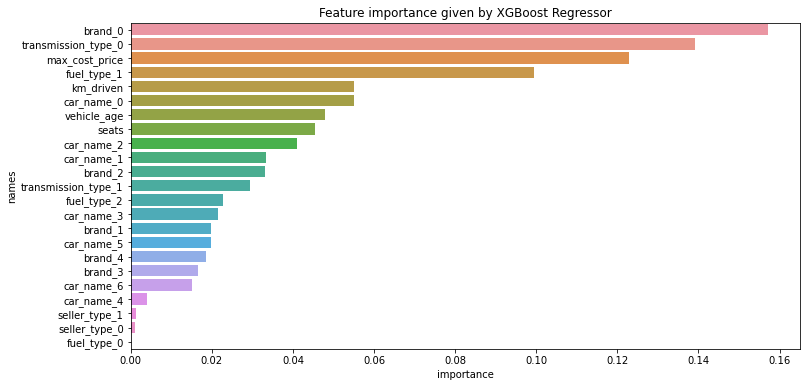

In [504]:
plt.figure(figsize = (12,6))
sns.barplot(x = "importance", y = "names", data = df_importance)
plt.title("Feature importance given by XGBoost Regressor")

# **ADVANCED MODELLING**

***STACKING***

In [505]:
from  sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor



decision_model =  DecisionTreeRegressor()
random_model = RandomForestRegressor() 
xgboost_model = xgboost.XGBRegressor()


estimators = [
              ("Random Forest", random_model),
              ("Decision Tree", decision_model),
              ("XGBoosting",xgboost_model)
              ]

final_estimator = GradientBoostingRegressor()
stacking_regressor = StackingRegressor(estimators = estimators, final_estimator = final_estimator,n_jobs = -1)
stacking_regressor.fit(X_train,y_train)

StackingRegressor(estimators=[('Random Forest', RandomForestRegressor()),
                              ('Decision Tree', DecisionTreeRegressor()),
                              ('XGBoosting', XGBRegressor())],
                  final_estimator=GradientBoostingRegressor(), n_jobs=-1)

In [506]:
y_pred_test7 = stacking_regressor.predict(X_test)

In [507]:
print("TRAIN ERROR:\n")

median_error7 = median_absolute_error(y_train,stacking_regressor.predict(X_train)).round(2)
print("Median Absolute Error:",median_error7)
r_squared7 = r2_score(y_train,stacking_regressor.predict(X_train)).round(2)
print("R Squared Value:", r_squared7)

print("-----------------------------------------------------------------------\n")
print("TEST ERROR:\n")
median_error7 = median_absolute_error(y_test, y_pred_test7).round(2)
print("Median Absolute Error:",median_error7)
r_squared7_test = r2_score(y_test,y_pred_test7).round(2)
print("R Squared Value:", r_squared7_test)

TRAIN ERROR:

Median Absolute Error: 0.04
R Squared Value: 0.91
-----------------------------------------------------------------------

TEST ERROR:

Median Absolute Error: 0.06
R Squared Value: 0.95


Text(0.5, 1.0, 'Actual v/s Predicted')

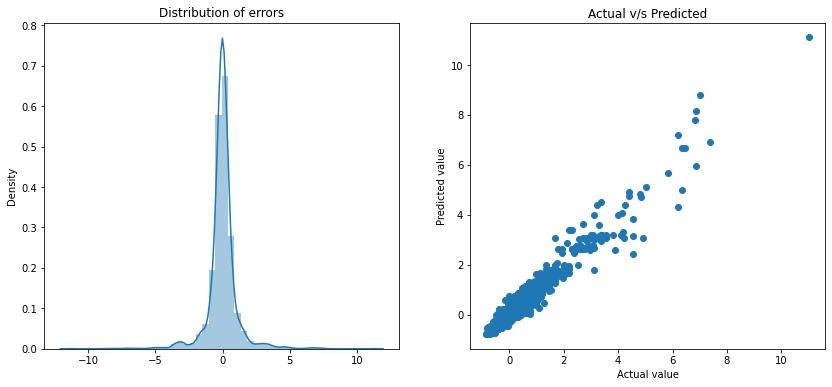

In [508]:


plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.distplot(y_test - y_pred_test7)
plt.title("figure 1")
plt.title("Distribution of errors")

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test7)
plt.title("figure 2")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual v/s Predicted")






1) The graph of errors looks like normal distribution

2) The plot is linear which means our prediction is pretty much good

***DEEP LEAARNING MODEL: ANN***

In [509]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor

In [510]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               3072      
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 65        
                                                                 
Total params: 11,393
Trainable params: 11,393
Non-trainable params: 0
_________________________________________________________________


In [511]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs =50)

Epoch 1/50
297/297 [==============================] - 1s 3ms/step - loss: 0.2080 - mae: 0.2080 - val_loss: 0.1435 - val_mae: 0.1435
Epoch 2/50
297/297 [==============================] - 1s 3ms/step - loss: 0.1501 - mae: 0.1501 - val_loss: 0.1353 - val_mae: 0.1353
Epoch 3/50
297/297 [==============================] - 1s 3ms/step - loss: 0.1400 - mae: 0.1400 - val_loss: 0.1207 - val_mae: 0.1207
Epoch 4/50
297/297 [==============================] - 1s 2ms/step - loss: 0.1319 - mae: 0.1319 - val_loss: 0.1175 - val_mae: 0.1175
Epoch 5/50
297/297 [==============================] - 1s 2ms/step - loss: 0.1297 - mae: 0.1297 - val_loss: 0.1118 - val_mae: 0.1118
Epoch 6/50
297/297 [==============================] - 1s 2ms/step - loss: 0.1257 - mae: 0.1257 - val_loss: 0.1152 - val_mae: 0.1152
Epoch 7/50
297/297 [==============================] - 1s 2ms/step - loss: 0.1218 - mae: 0.1218 - val_loss: 0.1124 - val_mae: 0.1124
Epoch 8/50
297/297 [==============================] - 1s 2ms/step - loss: 0.

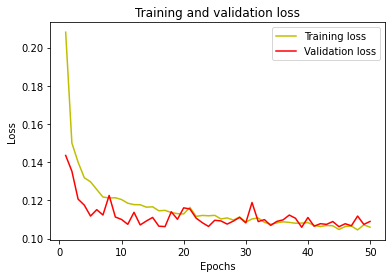

In [512]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [513]:
y_pred_test8 = model.predict(X_test)

In [514]:
print("TRAIN ERROR:\n")
median_error8 = median_absolute_error(y_train,model.predict(X_train)).round(2)
print("Median Absolute Error:",median_error8)
r_squared8 = r2_score(y_train,model.predict(X_train)).round(2)
print("R Squared Value:", r_squared8)
print("-----------------------------------------------------------------------\n")
print("TEST ERROR:\n")
median_error8 = median_absolute_error(y_test, y_pred_test8).round(2)
print("Median Absolute Error:",median_error8)
r_squared8_test = r2_score(y_test,y_pred_test8).round(2)
print("R Squared Value:", r_squared8_test)

TRAIN ERROR:

Median Absolute Error: 0.06
R Squared Value: 0.94
-----------------------------------------------------------------------

TEST ERROR:

Median Absolute Error: 0.07
R Squared Value: 0.94


Text(0.5, 1.0, 'Actual v/s Predicted')

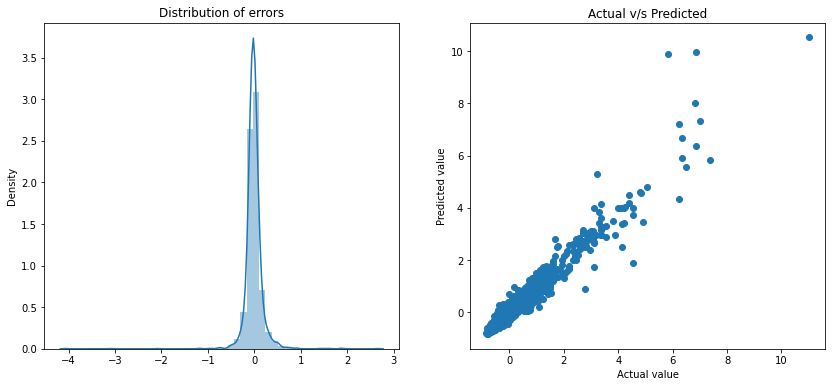

In [515]:

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.distplot(y_test - y_pred_test8)
plt.title("figure 1")
plt.title("Distribution of errors")

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test8)
plt.title("figure 2")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual v/s Predicted")


1) The graph of errors looks like normal distribution

2) The plot is linear which means our prediction is pretty much good

# **FEATURE TRANSFORMATION**

***LOG TRANSFORMATION***

In [516]:
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func=np.log1p)

In [517]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [518]:
xg_transformed = xg_regressor.fit(X_train_transformed,y_train)



[18:51:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [519]:
y_pred_test10 = xg_transformed.predict(X_test_transformed)

In [520]:
print("TRAIN ERROR:\n")

median_error10 = median_absolute_error(y_train,xg_transformed.predict(X_train_transformed)).round(2)
print("Median Absolute Error:",median_error10)
r_squared10 = r2_score(y_train,xg_transformed.predict(X_train_transformed)).round(2)
print("R Squared Value:", r_squared10)

print("-----------------------------------------------------------------------\n")
print("TEST ERROR:\n")
median_error10 = median_absolute_error(y_test, y_pred_test10).round(2)
print("Median Absolute Error:",median_error10)
r_squared10_test = r2_score(y_test,y_pred_test10).round(2)
print("R Squared Value:", r_squared10_test)

TRAIN ERROR:

Median Absolute Error: 0.07
R Squared Value: 0.94
-----------------------------------------------------------------------

TEST ERROR:

Median Absolute Error: 0.07
R Squared Value: 0.94


Text(0.5, 1.0, 'Actual v/s Predicted')

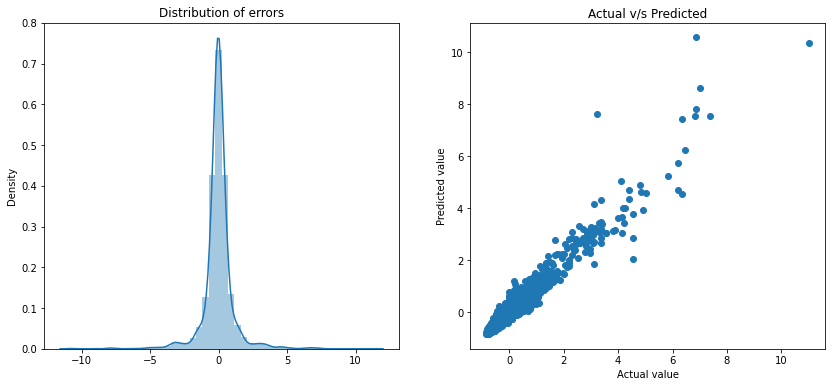

In [521]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.distplot(y_test - y_pred_test10)
plt.title("figure 1")
plt.title("Distribution of errors")

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test10)
plt.title("figure 2")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual v/s Predicted")

1) The graph of errors looks like normal distribution

2) The plot is linear which means our prediction is pretty much good

***RECIPROCAL TRANSFORMATION***

In [522]:

X_train_transformed = 1/X_train
X_test_transformed = 1/X_test

In [523]:
xg_transformed1= xg_regressor.fit(X_train_transformed,y_train)

[18:51:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [524]:
y_pred_test11 = xg_transformed1.predict(X_test_transformed)

In [525]:
print("TRAIN ERROR:\n")

median_error11 = median_absolute_error(y_train,xg_transformed1.predict(X_train_transformed)).round(2)
print("Median Absolute Error:",median_error11)
r_squared11 = r2_score(y_train,xg_transformed1.predict(X_train_transformed)).round(2)
print("R Squared Value:", r_squared11)

print("-----------------------------------------------------------------------\n")
print("TEST ERROR:\n")
median_error11 = median_absolute_error(y_test, y_pred_test11).round(2)
print("Median Absolute Error:",median_error11)
r_squared11_test = r2_score(y_test,y_pred_test11).round(2)
print("R Squared Value:", r_squared11_test)

TRAIN ERROR:

Median Absolute Error: 0.07
R Squared Value: 0.95
-----------------------------------------------------------------------

TEST ERROR:

Median Absolute Error: 0.07
R Squared Value: 0.93


Text(0.5, 1.0, 'Actual v/s Predicted')

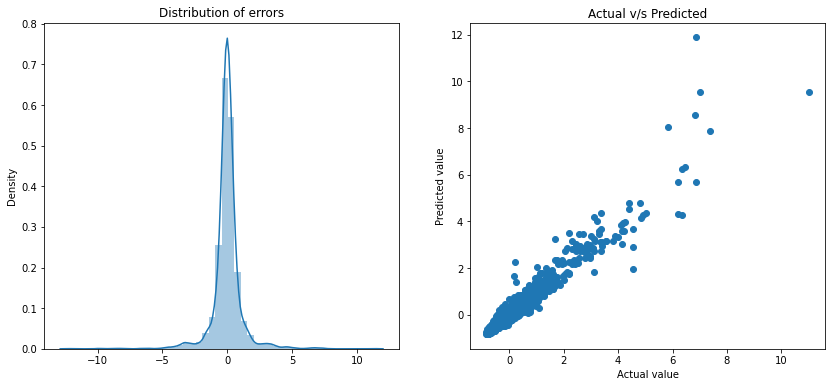

In [526]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.distplot(y_test - y_pred_test11)
plt.title("figure 1")
plt.title("Distribution of errors")

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test11)
plt.title("figure 2")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual v/s Predicted")

1) The graph of errors looks like normal distribution

2) The plot is linear which means our prediction is pretty much good

***SQUAREROOT TRANSFORMATION***

In [527]:
X_train_transformed2 = X_train**(1/2)
X_test_transformed2 = X_test**(1/2)

In [528]:
xg_transformed2= xg_regressor.fit(X_train_transformed2,y_train)

[18:52:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [529]:
y_pred_test12 = xg_transformed2.predict(X_test_transformed2)

In [530]:
print("TRAIN ERROR:\n")

median_error12 = median_absolute_error(y_train,xg_transformed2.predict(X_train_transformed2)).round(2)
print("Median Absolute Error:",median_error12)
r_squared12 = r2_score(y_train,xg_transformed2.predict(X_train_transformed2)).round(2)
print("R Squared Value:", r_squared12)

print("-----------------------------------------------------------------------\n")
print("TEST ERROR:\n")
median_error12 = median_absolute_error(y_test, y_pred_test12).round(2)
print("Median Absolute Error:",median_error12)
r_squared12_test = r2_score(y_test,y_pred_test12).round(2)
print("R Squared Value:", r_squared12_test)

TRAIN ERROR:

Median Absolute Error: 0.1
R Squared Value: 0.9
-----------------------------------------------------------------------

TEST ERROR:

Median Absolute Error: 0.1
R Squared Value: 0.9


Text(0.5, 1.0, 'Actual v/s Predicted')

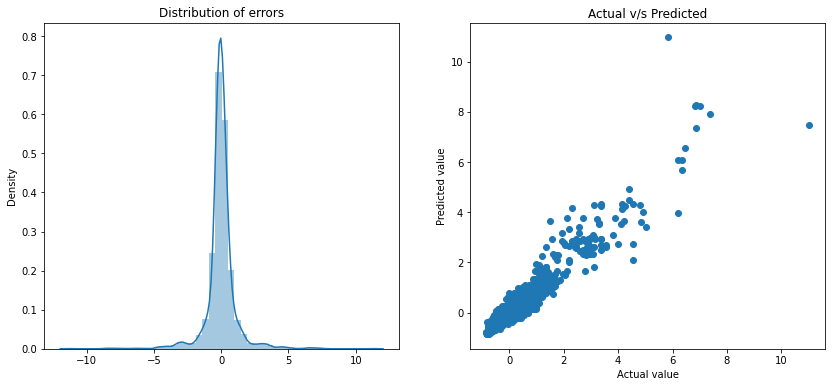

In [531]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.distplot(y_test - y_pred_test12)
plt.title("figure 1")
plt.title("Distribution of errors")

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test12)
plt.title("figure 2")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual v/s Predicted")

1) The graph of errors looks like normal distribution

2) The plot is linear which means our prediction is pretty much good

***EXPONENTIAL TRANSFORMATION***

In [532]:
X_train_transformed3 = X_train**(1/1.2)
X_test_transformed3 = X_test**(1/1.2)

In [533]:
xg_transformed3= xg_regressor.fit(X_train_transformed3,y_train)

[18:53:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [534]:
y_pred_test13 = xg_transformed3.predict(X_test_transformed3)

In [535]:
print("TRAIN ERROR:\n")
median_error13 = median_absolute_error(y_train,xg_transformed3.predict(X_train_transformed3)).round(2)
print("Median Absolute Error:",median_error13)
r_squared13 = r2_score(y_train,xg_transformed3.predict(X_train_transformed3)).round(2)
print("R Squared Value:", r_squared13)

print("-----------------------------------------------------------------------\n")
print("TEST ERROR:\n")
median_error13 = median_absolute_error(y_test, y_pred_test13).round(2)
print("Median Absolute Error:",median_error13)
r_squared13_test = r2_score(y_test,y_pred_test13).round(2)
print("R Squared Value:", r_squared13_test)

TRAIN ERROR:

Median Absolute Error: 0.1
R Squared Value: 0.9
-----------------------------------------------------------------------

TEST ERROR:

Median Absolute Error: 0.1
R Squared Value: 0.9


Text(0.5, 1.0, 'Actual v/s Predicted')

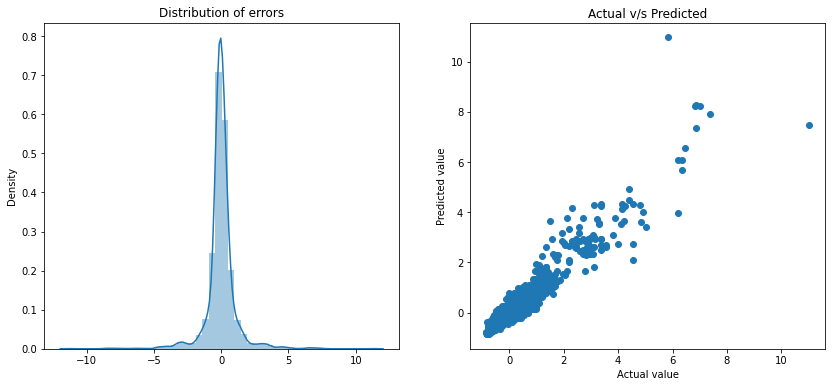

In [536]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.distplot(y_test - y_pred_test13)
plt.title("figure 1")
plt.title("Distribution of errors")

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test13)
plt.title("figure 2")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual v/s Predicted")

1) The graph of errors looks like normal distribution

2) The plot is linear which means our prediction is pretty much good

***SQUARE TRANSFORMATION***

In [537]:
X_train_transformed4 = X_train**(2)
X_test_transformed4 = X_test**(2)

In [538]:
xg_transformed4= xg_regressor.fit(X_train_transformed4,y_train)

[18:53:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [539]:
y_pred_test14 = xg_transformed4.predict(X_test_transformed4)

In [540]:
print("TRAIN ERROR:\n")

median_error14 = median_absolute_error(y_train,xg_transformed4.predict(X_train_transformed4)).round(2)
print("Median Absolute Error:",median_error14)
r_squared14 = r2_score(y_train,xg_transformed4.predict(X_train_transformed4)).round(2)
print("R Squared Value:", r_squared14)

print("-----------------------------------------------------------------------\n")
print("TEST ERROR:\n")
median_error14 = median_absolute_error(y_test, y_pred_test14).round(2)
print("Median Absolute Error:",median_error14)
r_squared14_test = r2_score(y_test,y_pred_test14).round(2)
print("R Squared Value:", r_squared14_test)

TRAIN ERROR:

Median Absolute Error: 0.08
R Squared Value: 0.92
-----------------------------------------------------------------------

TEST ERROR:

Median Absolute Error: 0.08
R Squared Value: 0.89


Text(0.5, 1.0, 'Actual v/s Predicted')

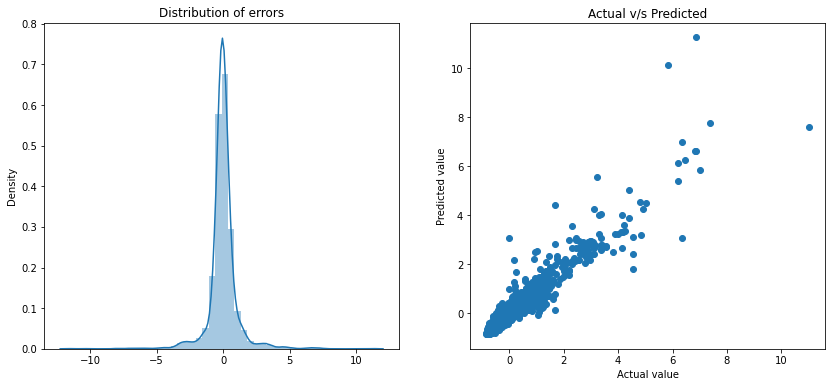

In [541]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.distplot(y_test - y_pred_test14)
plt.title("figure 1")
plt.title("Distribution of errors")

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test14)
plt.title("figure 2")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual v/s Predicted")

1) The graph of errors looks like normal distribution

2) The plot is linear which means our prediction is pretty much good

# **COMPARING VARIOUS MODELS**

***COMPARING DIFFERENT MODELS***

In [542]:
r2 = [r_squared1_test,r_squared11_test,r_squared12_test,r_squared3_test,r_squared4_test,r_squared5_test,r_squared6_test,r_squared7_test,r_squared8_test]
models = ["Linear regressor","lasso regressor","ridge regressor","DT regressor","RF regressor","GBDT regressor","XGBoost regressor","Stacking Regressor","ANN Regressor"]
df_r2 = pd.DataFrame({"r_squared": r2, "models": models})
df_r2 = df_r2.sort_values("r_squared", ascending = False).reset_index()
df_r2

,index,r_squared,models
0,6,0.95,XGBoost regressor
1,7,0.95,Stacking Regressor
2,5,0.94,GBDT regressor
3,8,0.94,ANN Regressor
4,1,0.93,lasso regressor
5,4,0.92,RF regressor
6,2,0.90,ridge regressor
7,0,0.72,Linear regressor
8,3,0.32,DT regressor


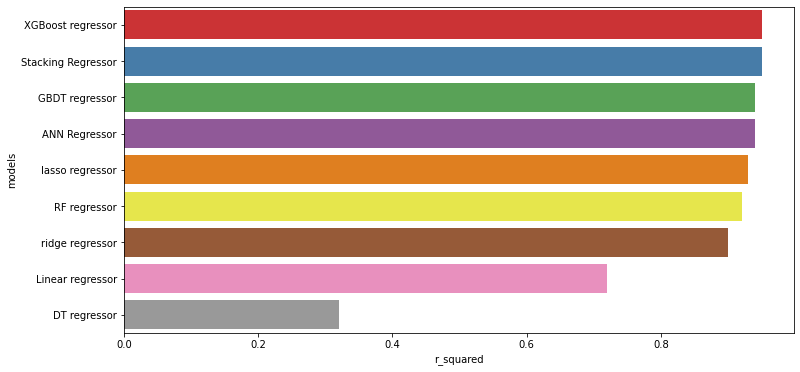

In [543]:
plt.figure(figsize = (12,6))
sns.barplot(x = "r_squared", y = "models", data = df_r2, palette = "Set1")

***COMPARING XGBOOST WITH VARIOUS FEATURE ENGINEERING TECHNIQUES***

In [544]:
r21 = [r_squared6_test,r_squared10_test,r_squared11_test,r_squared12_test,r_squared13_test,r_squared14_test]
models2 = ["XGBoost regressor without any transformation","XGBoost regressor with log transformation","XGBoost regressor with reciprocal transformation","XGBoost regressor with squareroot transformation","XGBoost regressor with exponential transformation","XGBoost regressor with square transformation"]
df = pd.DataFrame({"r_squared": r21, "models": models2})
df= df.sort_values("r_squared", ascending = False).reset_index()
df

,index,r_squared,models
0,0,0.95,XGBoost regressor without any transformation
1,1,0.94,XGBoost regressor with log transformation
2,2,0.93,XGBoost regressor with reciprocal transformation
3,3,0.90,XGBoost regressor with squareroot transformation
4,4,0.90,XGBoost regressor with exponential transformation
5,5,0.89,XGBoost regressor with square transformation


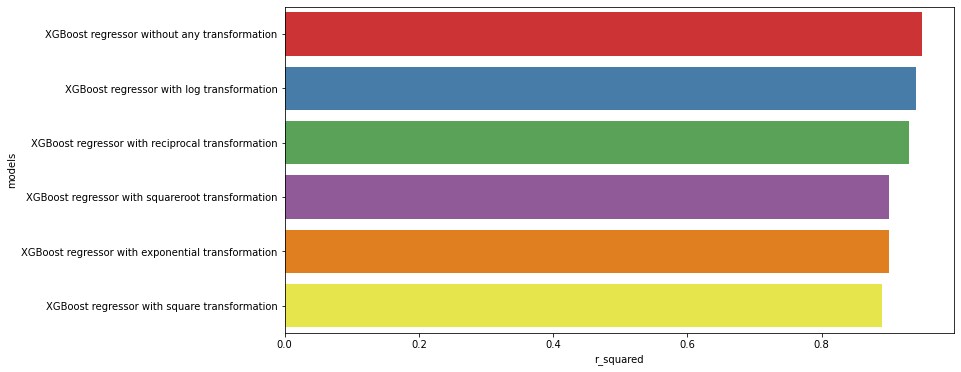

In [545]:
plt.figure(figsize = (12,6))
sns.barplot(x = df["r_squared"], y = df["models"], data = df, palette = "Set1")

***OBSERVATION:***

After comparing various models XGBoost model without any feature transformation works better. So finally I'm implementing it for future prediction and productionisation.

# **LATENCY CHECKING FOR VARIOUS MODELS**

**For XGBOOST MODEL**

In [546]:
from datetime import date
todays_date = date.today()
present_year = todays_date.year

In [547]:
import time
car_name = "Honda City"
brand = "Honda"
max_cost_price = 1700000
year_of_purchase = 2020
vehicle_age = present_year - year_of_purchase
km_driven  = 13000
seller_type = "Dealer"
fuel_type = "Petrol"
transmission_type = "Automatic"
seats = 5

input_data = {"car_name":[car_name],"brand": [brand], "max_cost_price":[max_cost_price],
              "vehicle_age": [vehicle_age],"km_driven":[km_driven], "seller_type":[seller_type],
              "fuel_type":[fuel_type],"transmission_type":[transmission_type], "seats":[seats]}

start = time.time()

df = pd.DataFrame(input_data)
df= encoder.transform(df)
df = scaling_transformer.transform(df)
y = xg_regressor.predict(df)
y = sc.inverse_transform([y])
answer = int(y.ravel().ravel())
print("The predicted selling price of the car is Rs.{}".format(answer))

end = time.time()
xgboost_latency =  (end-start) * 10**3


print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")


The predicted selling price of the car is Rs.706235
The time of execution of above program is : 18.962860107421875 ms


**FOR ANN REGRESSOR**

In [548]:
import time
car_name = "Honda City"
brand = "Honda"
max_cost_price = 1700000
year_of_purchase = 2020
vehicle_age = present_year - year_of_purchase
km_driven  = 13000
seller_type = "Dealer"
fuel_type = "Petrol"
transmission_type = "Automatic"
seats = 5

input_data = {"car_name":[car_name],"brand": [brand], "max_cost_price":[max_cost_price],
              "vehicle_age": [vehicle_age],"km_driven":[km_driven], "seller_type":[seller_type],
              "fuel_type":[fuel_type],"transmission_type":[transmission_type], "seats":[seats]}

start = time.time()

df = pd.DataFrame(input_data)
df= encoder.transform(df)
df = scaling_transformer.transform(df)
y = model.predict(df)
y = sc.inverse_transform(y)
answer = int(y.ravel().ravel())
print("The predicted selling price of the car is Rs.{}".format(answer))

end = time.time()
ann_latency = (end-start) * 10**3

print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The predicted selling price of the car is Rs.1295591
The time of execution of above program is : 116.10984802246094 ms


**GBDT REGRESSOR**

In [549]:
import time
car_name = "Honda City"
brand = "Honda"
max_cost_price = 1700000
year_of_purchase = 2020
vehicle_age = present_year - year_of_purchase
km_driven  = 13000
seller_type = "Dealer"
fuel_type = "Petrol"
transmission_type = "Automatic"
seats = 5

input_data = {"car_name":[car_name],"brand": [brand], "max_cost_price":[max_cost_price],
              "vehicle_age": [vehicle_age],"km_driven":[km_driven], "seller_type":[seller_type],
              "fuel_type":[fuel_type],"transmission_type":[transmission_type], "seats":[seats]}

start = time.time()

df = pd.DataFrame(input_data)
df= encoder.transform(df)
df = scaling_transformer.transform(df)
y = gbdt_regressor.predict(df)
y = sc.inverse_transform([y])
answer = int(y.ravel().ravel())
print("The predicted selling price of the car is Rs.{}".format(answer))

end = time.time()
gbdt_latency = (end-start) * 10**3

print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The predicted selling price of the car is Rs.1130615
The time of execution of above program is : 30.923128128051758 ms


**STACKING REGRESSOR**

In [550]:
import time
car_name = "Honda City"
brand = "Honda"
max_cost_price = 1700000
year_of_purchase = 2020
vehicle_age = present_year - year_of_purchase
km_driven  = 13000
seller_type = "Dealer"
fuel_type = "Petrol"
transmission_type = "Automatic"
seats = 5

input_data = {"car_name":[car_name],"brand": [brand], "max_cost_price":[max_cost_price],
              "vehicle_age": [vehicle_age],"km_driven":[km_driven], "seller_type":[seller_type],
              "fuel_type":[fuel_type],"transmission_type":[transmission_type], "seats":[seats]}

start = time.time()

df = pd.DataFrame(input_data)
df= encoder.transform(df)
df = scaling_transformer.transform(df)
y = stacking_regressor.predict(df)
y = sc.inverse_transform([y])
answer = int(y.ravel().ravel())
print("The predicted selling price of the car is Rs.{}".format(answer))

end = time.time()
stacking_latency = (end-start) * 10**3

print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The predicted selling price of the car is Rs.1207596
The time of execution of above program is : 40.1308536529541 ms


Text(0.5, 1.0, 'Latency comparision of various models')

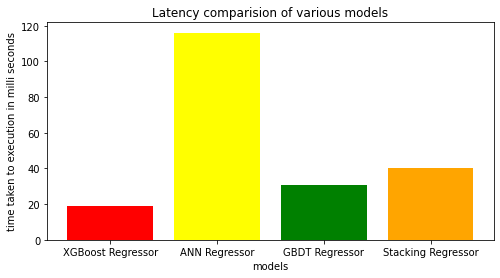

In [551]:
models = ["XGBoost Regressor","ANN Regressor","GBDT Regressor","Stacking Regressor"]
latency = [xgboost_latency ,ann_latency,gbdt_latency,stacking_latency]
color = ["red", "yellow","green","orange"]

plt.figure(figsize = (8,4))
plt.bar(models,latency, color = color)
plt.xlabel("models")
plt.ylabel("time taken to execution in milli seconds")
plt.title("Latency comparision of various models")


**OBSERVATIONS:**

XGBoost regressor gives the result faster compared to other models with the same performane(i.e R squared value)

# **PREDICTION USING XGBOOST**

In [552]:
from datetime import date
todays_date = date.today()
present_year = todays_date.year

***Prediction 1***

In [553]:
car_name = "Honda City"
brand = "Honda"
max_cost_price = 1700000
year_of_purchase = 2020
vehicle_age = present_year - year_of_purchase
km_driven  = 13000
seller_type = "Dealer"
fuel_type = "Petrol"
transmission_type = "Automatic"
seats = 5

input_data = {"car_name":[car_name],"brand": [brand], "max_cost_price":[max_cost_price],
              "vehicle_age": [vehicle_age],"km_driven":[km_driven], "seller_type":[seller_type],
              "fuel_type":[fuel_type],"transmission_type":[transmission_type], "seats":[seats]}

df = pd.DataFrame(input_data)
df= encoder.transform(df)
df = scaling_transformer.transform(df)
y = xg_regressor.predict(df)
y = sc.inverse_transform([y])
answer = int(y.ravel().ravel())
print("The predicted selling price of the car is Rs.{}".format(answer))


The predicted selling price of the car is Rs.706235


***Prediction 2***

In [554]:
car_name = "Hyundai i20"
brand = "Hyundai"
max_cost_price = 1307926
year_of_purchase = 2011
vehicle_age = present_year - year_of_purchase
km_driven  = 60000
seller_type = "individual"
fuel_type = "Petrol"
transmission_type = "manual"
seats = 5
input_data = {"car_name":[car_name],"brand": [brand], "max_cost_price":[max_cost_price],
              "vehicle_age": [vehicle_age],"km_driven":[km_driven], "seller_type":[seller_type],
              "fuel_type":[fuel_type],"transmission_type":[transmission_type], "seats":[seats]}

df = pd.DataFrame(input_data)
df= encoder.transform(df)
df = scaling_transformer.transform(df)
y = xg_regressor.predict(df)
y = sc.inverse_transform([y])
answer = int(y.ravel().ravel())
print("The predicted selling price of the car is Rs.{}".format(answer))

The predicted selling price of the car is Rs.513608


# **SAVING THE MODELS**

In [555]:
import pickle

In [556]:
file = open("carprice_encoding.pkl","wb")
pickle.dump(encoder,file)
file.close()

In [557]:
file = open("carprice_scaling.pkl","wb")
pickle.dump(scaling_transformer,file)
file.close()

In [558]:
file = open("carprice_predict_sc.pkl","wb")
pickle.dump(sc,file)
file.close()

In [559]:
model = xg_regressor
model.save_model("carprice.model")

# **PREDICTION BY LOADING THE SAVED MODEL**

In [560]:
model_load = xgboost.Booster({"nthread":4})
model_load.load_model("carprice.model")

[18:54:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [561]:
car_name = "Hyundai i20"
brand = "Hyundai"
max_cost_price = 1307926
year_of_purchase = 2011
vehicle_age = present_year - year_of_purchase
km_driven  = 60000
seller_type = "individual"
fuel_type = "Petrol"
transmission_type = "manual"
seats = 5
input_data = {"car_name":[car_name],"brand": [brand], "max_cost_price":[max_cost_price],
              "vehicle_age": [vehicle_age],"km_driven":[km_driven], "seller_type":[seller_type],
              "fuel_type":[fuel_type],"transmission_type":[transmission_type], "seats":[seats]}
df = pd.DataFrame(input_data)
df= encoder.transform(df)
df = scaling_transformer.transform(df)
dpred = xgboost.DMatrix(df)
print(dpred)
y = model_load.predict(dpred)
y = sc.inverse_transform([y])
answer = int(y.ravel().ravel())
print("The predicted selling price of the car is Rs.{}".format(answer))

The predicted selling price of the car is Rs.513608
